<a href="https://colab.research.google.com/github/mutuceng/house-pricing/blob/main/Backend/ML/data_prep.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [2]:
test_dataset = pd.read_csv('Dataset/test.csv')
train_dataset = pd.read_csv('Dataset/train.csv')

In [3]:
train_dataset.columns

Index(['id', 'Name', 'Gender', 'Age', 'City',
       'Working Professional or Student', 'Profession', 'Academic Pressure',
       'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction',
       'Sleep Duration', 'Dietary Habits', 'Degree',
       'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Financial Stress', 'Family History of Mental Illness', 'Depression'],
      dtype='object')

In [4]:
train_dataset.drop(columns=["id"], inplace=True)

In [5]:
train_dataset.shape

(140700, 19)

In [6]:
null_columns = train_dataset.isna().sum()
null_columns = null_columns[null_columns > 0]
null_columns

Profession             36630
Academic Pressure     112803
Work Pressure          27918
CGPA                  112802
Study Satisfaction    112803
Job Satisfaction       27910
Dietary Habits             4
Degree                     2
Financial Stress           4
dtype: int64

In [7]:
emp_trainset = train_dataset[train_dataset['Working Professional or Student'] != 'Student']
emp_trainset

,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,NaN,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,NaN,4.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,NaN,5.0,NaN,NaN,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,NaN,1.0,NaN,NaN,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0
5,Vani,Female,59.0,Ahmedabad,Working Professional,Finanancial Analyst,NaN,2.0,NaN,NaN,5.0,5-6 hours,Healthy,MCA,No,7.0,5.0,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140694,Ishaani,Female,45.0,Ahmedabad,Working Professional,Teacher,NaN,2.0,NaN,NaN,5.0,Less than 5 hours,Moderate,B.Ed,Yes,1.0,5.0,No,0
140695,Vidya,Female,18.0,Ahmedabad,Working Professional,NaN,NaN,5.0,NaN,NaN,4.0,5-6 hours,Unhealthy,Class 12,No,2.0,4.0,Yes,1
140696,Lata,Female,41.0,Hyderabad,Working Professional,Content Writer,NaN,5.0,NaN,NaN,4.0,7-8 hours,Moderate,B.Tech,Yes,6.0,5.0,Yes,0
140697,Aanchal,Female,24.0,Kolkata,Working Professional,Marketing Manager,NaN,3.0,NaN,NaN,1.0,More than 8 hours,Moderate,B.Com,No,4.0,4.0,No,0


In [8]:
# Null olmayan satırları filtreleme
non_null_emp_trainset = emp_trainset[emp_trainset['Academic Pressure'].notnull() & emp_trainset['Study Satisfaction'].notnull() & emp_trainset['CGPA'].notnull()]

# Null olmayan satırların sayısı
non_null_count = non_null_emp_trainset.shape[0]

# 5 tane örnek
sample_non_null_emp_trainset = non_null_emp_trainset.sample(5)

print(f"Non-null rows count: {non_null_count}")
sample_non_null_emp_trainset

Non-null rows count: 5


,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
99062,Tanisha,Female,24.0,Surat,Working Professional,Content Writer,4.0,NaN,5.42,4.0,NaN,Less than 5 hours,Moderate,B.Ed,Yes,1.0,5.0,No,1
18752,Aarti,Female,18.0,Kalyan,Working Professional,NaN,2.0,NaN,8.14,5.0,NaN,Less than 5 hours,Healthy,Class 12,Yes,7.0,1.0,Yes,1
41915,Advait,Male,18.0,Kolkata,Working Professional,NaN,4.0,NaN,8.04,3.0,NaN,5-6 hours,Healthy,Class 12,Yes,1.0,5.0,Yes,1
101189,Keshav,Male,34.0,Rajkot,Working Professional,NaN,4.0,NaN,8.24,3.0,NaN,More than 8 hours,Moderate,MD,No,11.0,1.0,No,0
55827,Prachi,Female,19.0,Kalyan,Working Professional,NaN,3.0,NaN,8.11,2.0,NaN,5-6 hours,Unhealthy,Class 12,Yes,4.0,4.0,No,1


In [9]:
nullprofession_emp_trainset = emp_trainset[emp_trainset['Profession'].isnull()]
nullprofession_emp_trainset


,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
29,Kashish,Female,19.0,Agra,Working Professional,NaN,NaN,1.0,NaN,NaN,5.0,More than 8 hours,Healthy,Class 12,No,5.0,2.0,No,0
36,Anvi,Female,50.0,Kalyan,Working Professional,NaN,NaN,4.0,NaN,NaN,4.0,7-8 hours,Unhealthy,Class 12,No,0.0,2.0,No,0
43,Vidya,Female,18.0,Vadodara,Working Professional,NaN,NaN,5.0,NaN,NaN,4.0,Less than 5 hours,Moderate,Class 12,Yes,10.0,5.0,No,1
48,Anand,Male,38.0,Ghaziabad,Working Professional,NaN,NaN,2.0,NaN,NaN,5.0,5-6 hours,Moderate,Class 12,No,1.0,1.0,Yes,0
50,Raunak,Male,21.0,Pune,Working Professional,NaN,NaN,4.0,NaN,NaN,5.0,5-6 hours,Healthy,Class 12,Yes,8.0,5.0,Yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140647,Yuvraj,Male,35.0,Rajkot,Working Professional,NaN,NaN,5.0,NaN,NaN,1.0,7-8 hours,Unhealthy,Class 12,Yes,11.0,2.0,Yes,1
140655,Kiran,Male,44.0,Meerut,Working Professional,NaN,NaN,1.0,NaN,NaN,3.0,More than 8 hours,Healthy,PhD,No,0.0,4.0,No,0
140666,Abhishek,Male,18.0,Vadodara,Working Professional,NaN,NaN,5.0,NaN,NaN,4.0,Less than 5 hours,Moderate,Class 12,No,2.0,5.0,No,1
140667,Kashish,Female,19.0,Rajkot,Working Professional,NaN,NaN,4.0,NaN,NaN,2.0,More than 8 hours,Unhealthy,MHM,Yes,12.0,4.0,Yes,1


In [10]:
a = emp_trainset [emp_trainset["Profession"] == 'Unemployed']
a

,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
322,Aarush,Male,58.0,Mumbai,Working Professional,Unemployed,NaN,1.0,NaN,NaN,5.0,5-6 hours,Unhealthy,B.Pharm,No,4.0,3.0,Yes,0
78938,Anand,Male,21.0,Kalyan,Working Professional,Unemployed,NaN,1.0,NaN,NaN,4.0,7-8 hours,Unhealthy,BBA,Yes,5.0,5.0,Yes,1
115614,Vaanya,Female,37.0,Varanasi,Working Professional,Unemployed,NaN,3.0,NaN,NaN,4.0,Less than 5 hours,Moderate,MSc,Yes,10.0,4.0,Yes,0


In [11]:
emp_trainset['Profession'].fillna('Unemployed', inplace=True)

C:\Users\ulasu\AppData\Local\Temp\ipykernel_24260\4183217683.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  emp_trainset['Profession'].fillna('Unemployed', inplace=True)


In [12]:
a = emp_trainset [emp_trainset["Profession"] == 'Unemployed']
a.sample(10)

,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
4954,Rajat,Male,59.0,Kanpur,Working Professional,Unemployed,NaN,3.0,NaN,NaN,5.0,Less than 5 hours,Unhealthy,Class 12,Yes,0.0,4.0,No,0
5646,Ranveer,Male,50.0,Rajkot,Working Professional,Unemployed,NaN,4.0,NaN,NaN,4.0,7-8 hours,Moderate,Class 12,Yes,3.0,1.0,Yes,0
123063,Sanya,Female,56.0,Ludhiana,Working Professional,Unemployed,NaN,1.0,NaN,NaN,1.0,More than 8 hours,Moderate,Class 12,Yes,10.0,1.0,Yes,0
120072,Shrey,Male,53.0,Ludhiana,Working Professional,Unemployed,NaN,1.0,NaN,NaN,5.0,More than 8 hours,Moderate,Class 12,Yes,2.0,5.0,Yes,0
97295,Aadhya,Female,56.0,Surat,Working Professional,Unemployed,NaN,2.0,NaN,NaN,2.0,7-8 hours,Moderate,BHM,No,10.0,4.0,No,0
74176,Navya,Female,42.0,Kolkata,Working Professional,Unemployed,NaN,1.0,NaN,NaN,4.0,5-6 hours,Unhealthy,Class 12,No,12.0,2.0,No,0
26759,Rohan,Male,18.0,Ludhiana,Working Professional,Unemployed,NaN,4.0,NaN,NaN,1.0,More than 8 hours,Unhealthy,Class 12,Yes,11.0,5.0,Yes,1
92921,Harsha,Male,20.0,Ludhiana,Working Professional,Unemployed,NaN,5.0,NaN,NaN,1.0,Less than 5 hours,Healthy,Class 12,No,10.0,4.0,Yes,0
26586,Rohan,Male,42.0,Agra,Working Professional,Unemployed,NaN,5.0,NaN,NaN,1.0,Less than 5 hours,Unhealthy,Class 12,Yes,9.0,2.0,No,0
7074,Anand,Male,20.0,Ahmedabad,Working Professional,Unemployed,NaN,3.0,NaN,NaN,4.0,5-6 hours,Moderate,Class 12,No,0.0,4.0,No,0


In [13]:
emp_trainset["Profession"].unique()

array(['Chef', 'Teacher', 'Business Analyst', 'Finanancial Analyst',
       'Chemist', 'Electrician', 'Software Engineer', 'Data Scientist',
       'Plumber', 'Marketing Manager', 'Accountant', 'Entrepreneur',
       'HR Manager', 'UX/UI Designer', 'Content Writer', 'Unemployed',
       'Educational Consultant', 'Civil Engineer', 'Manager',
       'Pharmacist', 'Financial Analyst', 'Architect',
       'Mechanical Engineer', 'Customer Support', 'Consultant', 'Judge',
       'Researcher', 'Pilot', 'Graphic Designer', 'Travel Consultant',
       'Digital Marketer', 'Lawyer', 'Research Analyst',
       'Sales Executive', 'Doctor', 'Investment Banker',
       'Family Consultant', 'B.Com', 'BE', 'Student', 'Yogesh', 'Dev',
       'MBA', 'LLM', 'BCA', 'Academic', 'Profession', 'FamilyVirar',
       'City Manager', 'BBA', 'Medical Doctor', 'Working Professional',
       'MBBS', 'Patna', 'Unveil', 'B.Ed', 'Nagpur', 'Moderate', 'M.Ed',
       'Analyst', 'Pranav', 'Visakhapatnam', 'PhD', 'Yuvraj'

In [14]:
# Calculate the percentage of depression based on Profession
depression_by_profession = emp_trainset.groupby('Profession')['Depression'].value_counts(normalize=True).unstack() * 100

# Display the depression percentages
print(depression_by_profession)

Depression                     0          1
Profession                                 
Academic              100.000000        NaN
Accountant             93.577296   6.422704
Analyst               100.000000        NaN
Architect              90.233838   9.766162
B.Com                 100.000000        NaN
...                          ...        ...
Unveil                100.000000        NaN
Visakhapatnam         100.000000        NaN
Working Professional  100.000000        NaN
Yogesh                 33.333333  66.666667
Yuvraj                100.000000        NaN

[64 rows x 2 columns]


In [15]:
emp_trainset["Profession"].value_counts()

Profession
Teacher           24900
Unemployed         8766
Content Writer     7812
Architect          4362
Consultant         4229
                  ...  
FamilyVirar           1
Dev                   1
BE                    1
B.Com                 1
Yuvraj                1
Name: count, Length: 64, dtype: int64

In [16]:
# Silinecek meslekler
professions_to_remove = ['Family Consultant', 'Working Professional','City Manager', 'Medical Doctor', 'Analyst','Patna','Moderate','Yuvraj','BCA','Nagpur','Dev','Visakhapatnam','B.Ed','LLM', 'B.Ed', 'BE', 'B.Com', 'Yogesh','Student','Profession','FamilyVirar','Unveil','Pranav','M.Ed','MBA','BBA','MBBS','PhD']

# Bu meslekleri içeren satırları veri çerçevesinden kaldırma
emp_trainset = emp_trainset[~emp_trainset['Profession'].isin(professions_to_remove)]

# Sonucu kontrol etme
emp_trainset['Profession'].unique()

array(['Chef', 'Teacher', 'Business Analyst', 'Finanancial Analyst',
       'Chemist', 'Electrician', 'Software Engineer', 'Data Scientist',
       'Plumber', 'Marketing Manager', 'Accountant', 'Entrepreneur',
       'HR Manager', 'UX/UI Designer', 'Content Writer', 'Unemployed',
       'Educational Consultant', 'Civil Engineer', 'Manager',
       'Pharmacist', 'Financial Analyst', 'Architect',
       'Mechanical Engineer', 'Customer Support', 'Consultant', 'Judge',
       'Researcher', 'Pilot', 'Graphic Designer', 'Travel Consultant',
       'Digital Marketer', 'Lawyer', 'Research Analyst',
       'Sales Executive', 'Doctor', 'Investment Banker', 'Academic'],
      dtype=object)

In [17]:
emp_trainset.sample(5)

,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
18314,Mihir,Male,43.0,Vadodara,Working Professional,Chef,NaN,5.0,NaN,NaN,3.0,5-6 hours,Moderate,MHM,No,5.0,1.0,Yes,0
80071,Anvi,Female,48.0,Patna,Working Professional,Mechanical Engineer,NaN,4.0,NaN,NaN,4.0,More than 8 hours,Moderate,M.Tech,No,11.0,1.0,No,0
80062,Srishti,Female,51.0,Vasai-Virar,Working Professional,Content Writer,NaN,3.0,NaN,NaN,5.0,7-8 hours,Healthy,BA,Yes,9.0,5.0,No,0
38476,Vani,Female,53.0,Ahmedabad,Working Professional,Researcher,NaN,1.0,NaN,NaN,5.0,More than 8 hours,Moderate,BCA,Yes,0.0,5.0,No,0
10812,Sanya,Female,28.0,Surat,Working Professional,Customer Support,NaN,2.0,NaN,NaN,2.0,5-6 hours,Unhealthy,MA,No,9.0,3.0,No,0


In [18]:
from sklearn.preprocessing import LabelEncoder

# LabelEncoder nesnesi oluşturma
label_encoder = LabelEncoder()

# Profession sütununu label encoding ile dönüştürme
emp_trainset['Profession'] = label_encoder.fit_transform(emp_trainset['Profession'])

# Dönüştürülmüş değerleri kontrol etme
emp_trainset['Profession'].unique()

C:\Users\ulasu\AppData\Local\Temp\ipykernel_24260\2174739578.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  emp_trainset['Profession'] = label_encoder.fit_transform(emp_trainset['Profession'])


array([ 4, 33,  3, 16,  5, 14, 32, 10, 28, 24,  1, 15, 19, 35,  8, 36, 13,
        6, 23, 26, 17,  2, 25,  9,  7, 21, 30, 27, 18, 34, 11, 22, 29, 31,
       12, 20,  0])

In [19]:
emp_trainset.columns

Index(['Name', 'Gender', 'Age', 'City', 'Working Professional or Student',
       'Profession', 'Academic Pressure', 'Work Pressure', 'CGPA',
       'Study Satisfaction', 'Job Satisfaction', 'Sleep Duration',
       'Dietary Habits', 'Degree', 'Have you ever had suicidal thoughts ?',
       'Work/Study Hours', 'Financial Stress',
       'Family History of Mental Illness', 'Depression'],
      dtype='object')

In [20]:
emp_trainset = emp_trainset.drop(columns=["Working Professional or Student", "Name"])

In [21]:
emp_trainset["Profession"].unique()

array([ 4, 33,  3, 16,  5, 14, 32, 10, 28, 24,  1, 15, 19, 35,  8, 36, 13,
        6, 23, 26, 17,  2, 25,  9,  7, 21, 30, 27, 18, 34, 11, 22, 29, 31,
       12, 20,  0])

In [22]:
emp_trainset["City"].unique()

array(['Ludhiana', 'Varanasi', 'Mumbai', 'Kanpur', 'Ahmedabad', 'Thane',
       'Nashik', 'Patna', 'Rajkot', 'Jaipur', 'Pune', 'Lucknow', 'Meerut',
       'Agra', 'Surat', 'Faridabad', 'Hyderabad', 'Ghaziabad', 'Kolkata',
       'Chennai', 'Kalyan', 'Nagpur', 'Vadodara', 'Vasai-Virar', 'Delhi',
       'Bangalore', 'Srinagar', 'Visakhapatnam', 'Bhopal', 'Indore',
       'Ishanabad', 'Vidhi', 'Ayush', 'Gurgaon', 'Krishna', 'Aishwarya',
       'Keshav', 'Harsha', 'Nalini', 'Aditya', 'Malyansh', 'Raghavendra',
       'Nandini', 'M.Com', 'Plata', 'Atharv', 'Pratyush', 'MCA',
       'Moreadhyay', 'Morena', 'Ishkarsh', 'Kashk', 'Mihir', 'City',
       'Vidya', 'Tolkata', 'Anvi', 'Krinda', 'Ayansh', 'Shrey', 'Ivaan',
       'Bhavna', 'Kashish', 'Vaishnavi', 'Chhavi', 'Parth', 'Mahi',
       'Tushar', 'MSc', 'No', 'Molkata', 'Researcher', 'Kagan', 'Armaan',
       'Ithal', 'Dhruv', 'Galesabad', 'Itheg', 'Saanvi', 'Aaradhya',
       'Pooja', 'Khushi', 'Jhanvi', 'Unirar'], dtype=object)

In [23]:
cities = ['Ludhiana', 'Varanasi', 'Mumbai', 'Kanpur', 'Ahmedabad', 'Thane',
          'Nashik', 'Patna', 'Rajkot', 'Jaipur', 'Pune', 'Lucknow', 'Meerut',
          'Agra', 'Surat', 'Faridabad', 'Hyderabad', 'Ghaziabad', 'Kolkata',
          'Chennai', 'Kalyan', 'Nagpur', 'Vadodara', 'Vasai-Virar', 'Delhi',
          'Bangalore', 'Srinagar', 'Visakhapatnam', 'Bhopal', 'Indore',
          'Ishanabad', 'Vidhi', 'Ayush', 'Gurgaon', 'Krishna', 'Aishwarya',
          'Keshav', 'Harsha', 'Nalini', 'Aditya', 'Malyansh', 'Raghavendra',
          'Nandini', 'M.Com', 'Plata', 'Atharv', 'Pratyush', 'MCA',
          'Moreadhyay', 'Morena', 'Ishkarsh', 'Kashk', 'Mihir', 'City',
          'Vidya', 'Tolkata', 'Anvi', 'Krinda', 'Ayansh', 'Shrey', 'Ivaan',
          'Bhavna', 'Kashish', 'Vaishnavi', 'Chhavi', 'Parth', 'Mahi',
          'Tushar', 'MSc', 'No', 'Molkata', 'Researcher', 'Kagan', 'Armaan',
          'Ithal', 'Dhruv', 'Galesabad', 'Itheg', 'Saanvi', 'Aaradhya',
          'Pooja', 'Khushi', 'Jhanvi', 'Unirar']

# Şehir olmayan değerler
non_city_values = [value for value in cities if value not in ['Ludhiana', 'Varanasi', 'Mumbai', 'Kanpur', 'Ahmedabad', 'Thane',
    'Nashik', 'Patna', 'Rajkot', 'Jaipur', 'Pune', 'Lucknow', 'Meerut', 'Agra', 'Surat', 'Faridabad', 'Hyderabad', 'Ghaziabad', 'Kolkata',
    'Chennai', 'Kalyan', 'Nagpur', 'Vadodara', 'Vasai-Virar', 'Delhi', 'Bangalore', 'Srinagar', 'Visakhapatnam', 'Bhopal', 'Indore']]

# non_city_values array'ini yazdırma
print(non_city_values)


['Ishanabad', 'Vidhi', 'Ayush', 'Gurgaon', 'Krishna', 'Aishwarya', 'Keshav', 'Harsha', 'Nalini', 'Aditya', 'Malyansh', 'Raghavendra', 'Nandini', 'M.Com', 'Plata', 'Atharv', 'Pratyush', 'MCA', 'Moreadhyay', 'Morena', 'Ishkarsh', 'Kashk', 'Mihir', 'City', 'Vidya', 'Tolkata', 'Anvi', 'Krinda', 'Ayansh', 'Shrey', 'Ivaan', 'Bhavna', 'Kashish', 'Vaishnavi', 'Chhavi', 'Parth', 'Mahi', 'Tushar', 'MSc', 'No', 'Molkata', 'Researcher', 'Kagan', 'Armaan', 'Ithal', 'Dhruv', 'Galesabad', 'Itheg', 'Saanvi', 'Aaradhya', 'Pooja', 'Khushi', 'Jhanvi', 'Unirar']


In [24]:
emp_trainset.shape

(112760, 17)

In [25]:
emp_trainset = emp_trainset[~emp_trainset['City'].isin(non_city_values)]

In [26]:
emp_trainset["City"].unique()

array(['Ludhiana', 'Varanasi', 'Mumbai', 'Kanpur', 'Ahmedabad', 'Thane',
       'Nashik', 'Patna', 'Rajkot', 'Jaipur', 'Pune', 'Lucknow', 'Meerut',
       'Agra', 'Surat', 'Faridabad', 'Hyderabad', 'Ghaziabad', 'Kolkata',
       'Chennai', 'Kalyan', 'Nagpur', 'Vadodara', 'Vasai-Virar', 'Delhi',
       'Bangalore', 'Srinagar', 'Visakhapatnam', 'Bhopal', 'Indore'],
      dtype=object)

In [27]:
from sklearn.preprocessing import LabelEncoder

# LabelEncoder nesnesi oluşturma
label_encoder = LabelEncoder()

# Profession sütununu label encoding ile dönüştürme
emp_trainset['City'] = label_encoder.fit_transform(emp_trainset['City'])

# Dönüştürülmüş değerleri kontrol etme
emp_trainset['City'].unique()

array([15, 27, 17, 12,  1, 25, 19, 20, 22, 10, 21, 14, 16,  0, 24,  6,  8,
        7, 13,  4, 11, 18, 26, 28,  5,  2, 23, 29,  3,  9])

In [28]:
emp_trainset.sample(5)

,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
135628,Male,48.0,16,34,NaN,5.0,NaN,NaN,3.0,Less than 5 hours,Moderate,MHM,Yes,10.0,2.0,Yes,0
103552,Female,49.0,14,5,NaN,1.0,NaN,NaN,3.0,5-6 hours,Moderate,MD,No,11.0,4.0,No,0
17832,Female,49.0,23,9,NaN,3.0,NaN,NaN,5.0,Less than 5 hours,Unhealthy,MA,No,4.0,5.0,No,0
112639,Female,18.0,9,36,NaN,2.0,NaN,NaN,1.0,More than 8 hours,Moderate,Class 12,No,5.0,3.0,No,0
135703,Male,41.0,5,21,NaN,4.0,NaN,NaN,3.0,7-8 hours,Unhealthy,LLB,No,6.0,4.0,Yes,0


In [29]:
# Null olmayan satırları filtreleme
non_null_emp_trainset = emp_trainset[emp_trainset['Study Satisfaction'].notnull() | emp_trainset['CGPA'].notnull() | emp_trainset['Academic Pressure'].notnull()]

# Null olmayan satırların sayısı
non_null_count = non_null_emp_trainset.shape[0]

# 5 tane örnek

print(f"Non-null rows count: {non_null_count}")
non_null_emp_trainset.sample(5)


Non-null rows count: 6


,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
18752,Female,18.0,11,36,2.0,NaN,8.14,5.0,NaN,Less than 5 hours,Healthy,Class 12,Yes,7.0,1.0,Yes,1
101189,Male,34.0,22,36,4.0,NaN,8.24,3.0,NaN,More than 8 hours,Moderate,MD,No,11.0,1.0,No,0
99062,Female,24.0,24,8,4.0,NaN,5.42,4.0,NaN,Less than 5 hours,Moderate,B.Ed,Yes,1.0,5.0,No,1
41915,Male,18.0,13,36,4.0,NaN,8.04,3.0,NaN,5-6 hours,Healthy,Class 12,Yes,1.0,5.0,Yes,1
60348,Male,29.0,0,36,NaN,NaN,9.72,2.0,NaN,5-6 hours,Moderate,B.Ed,No,7.0,2.0,Yes,0


In [30]:
emp_trainset.shape

(112688, 17)

In [31]:
emp_trainset = emp_trainset[~((emp_trainset["Academic Pressure"].notnull()) |
                              (emp_trainset["CGPA"].notnull()) |
                              (emp_trainset["Study Satisfaction"].notnull()) )]

In [32]:
emp_trainset.shape

(112682, 17)

In [33]:
emp_trainset = emp_trainset.drop(columns=["Academic Pressure", "CGPA", "Study Satisfaction"])

In [34]:
emp_trainset.shape

(112682, 14)

In [35]:
emp_trainset.sample(5)

,Gender,Age,City,Profession,Work Pressure,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
119664,Male,53.0,17,33,2.0,5.0,7-8 hours,Unhealthy,LLM,No,11.0,1.0,No,0
13954,Male,56.0,7,24,3.0,2.0,More than 8 hours,Moderate,B.Com,Yes,0.0,5.0,Yes,0
67891,Male,47.0,22,33,3.0,2.0,5-6 hours,Unhealthy,M.Ed,Yes,11.0,5.0,Yes,0
22489,Male,44.0,0,13,3.0,2.0,7-8 hours,Healthy,M.Ed,No,0.0,2.0,Yes,0
97030,Male,54.0,13,8,3.0,1.0,5-6 hours,Moderate,BSc,No,0.0,5.0,Yes,0


In [36]:
emp_trainset["Sleep Duration"].unique()

array(['More than 8 hours', 'Less than 5 hours', '5-6 hours', '7-8 hours',
       'Sleep_Duration', '6-8 hours', '4-6 hours', '6-7 hours',
       '8-9 hours', '9-11 hours', '2-3 hours', '3-4 hours', '4-5 hours',
       '9-6 hours', '1-3 hours', 'Indore', '45', '1-6 hours',
       '35-36 hours', 'No', '10-6 hours', '49 hours', 'Unhealthy',
       'Work_Study_Hours', '3-6 hours', '45-48 hours', '9-5', 'Pune',
       '9-5 hours'], dtype=object)

In [37]:
invalid_hours = ['3-6 hours','10-6 hours','45', '55-66 hours', 'Moderate', 'Sleep_Duration', 'No', 'Work_Study_Hours','Indore','Unhealthy', 'Pune', '35-36 hours','45-48 hours','49 hours','9-6 hours','9-5','9-5 hours','']

# Bu değerleri içeren satırları filtreleme
emp_trainset = emp_trainset[~emp_trainset['Sleep Duration'].isin(invalid_hours)]

emp_trainset["Sleep Duration"].unique()

array(['More than 8 hours', 'Less than 5 hours', '5-6 hours', '7-8 hours',
       '6-8 hours', '4-6 hours', '6-7 hours', '8-9 hours', '9-11 hours',
       '2-3 hours', '3-4 hours', '4-5 hours', '1-3 hours', '1-6 hours'],
      dtype=object)

In [38]:
emp_trainset['Sleep Duration'] = emp_trainset['Sleep Duration'].replace({
    '1-3 hours': 'Less than 3 hours',
    '2-3 hours': 'Less than 3 hours',
    '1-6 hours': 'Less than 5 hours',
    '3-4 hours': 'Less than 5 hours',
    '4-5 hours': '5-6 hours',
    '4-6 hours': '5-6 hours',
    '6-7 hours': '7-8 hours',
    '6-8 hours': '7-8 hours',
    '9-11 hours': 'More than 8 hours',
    '8-9 hours': 'More than 8 hours'
})

emp_trainset["Sleep Duration"].value_counts()

Sleep Duration
Less than 5 hours    30459
7-8 hours            29594
More than 8 hours    26668
5-6 hours            25937
Less than 3 hours        4
Name: count, dtype: int64

In [39]:
empsleep_mapping = {
    'Less than 3 hours':5,
    'Less than 5 hours' : 4,
    '7-8 hours': 2,
    '5-6 hours':3,
    'More than 8 hours':1
}

# Veriye uygulama
emp_trainset['Sleep Duration'] = emp_trainset['Sleep Duration'].map(empsleep_mapping)

In [40]:
emp_trainset.sample(5)

,Gender,Age,City,Profession,Work Pressure,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
71245,Female,50.0,29,36,1.0,2.0,2,Moderate,Class 12,No,7.0,5.0,No,0
34828,Female,45.0,1,33,5.0,1.0,3,Healthy,B.Ed,Yes,11.0,2.0,Yes,0
24323,Female,43.0,11,13,1.0,2.0,4,Healthy,B.Ed,No,6.0,2.0,Yes,0
101959,Male,48.0,25,29,1.0,5.0,4,Moderate,BBA,No,4.0,3.0,Yes,0
44320,Female,47.0,24,33,2.0,1.0,4,Unhealthy,LLB,No,2.0,2.0,No,0


In [41]:
emp_trainset["Dietary Habits"].unique()

array(['Healthy', 'Unhealthy', 'Moderate', 'Yes', 'Pratham', 'BSc',
       'Gender', 'More Healthy', 'Hormonal', 'Electrician', nan, 'Vegas',
       'No', 'Indoor', 'Class 12'], dtype=object)

In [42]:
# 'Healthy', 'Unhealthy', 'Moderate' dışındaki tüm değerleri invalid-habits dizisine yazma
invalid_habits = emp_trainset['Dietary Habits'].unique().tolist()
valid_habits = ['Healthy', 'Unhealthy', 'Moderate']
invalid_habits = [habit for habit in invalid_habits if habit not in valid_habits]

print(invalid_habits)

['Yes', 'Pratham', 'BSc', 'Gender', 'More Healthy', 'Hormonal', 'Electrician', nan, 'Vegas', 'No', 'Indoor', 'Class 12']


In [43]:
emp_trainset.shape

(112662, 14)

In [44]:
emp_trainset = emp_trainset[~emp_trainset['Dietary Habits'].isin(invalid_habits)]

In [45]:
emp_trainset.shape

(112647, 14)

In [46]:
empeating_mapping = {
    'Unhealthy' : 2,
    'Healthy': 0,
    'Moderate':1
}

# Veriye uygulama
emp_trainset['Dietary Habits'] = emp_trainset['Dietary Habits'].map(empeating_mapping)

In [47]:
emp_trainset.sample(5)

,Gender,Age,City,Profession,Work Pressure,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
77467,Male,32.0,1,18,3.0,5.0,3,1,B.Tech,No,7.0,3.0,No,0
37138,Male,43.0,3,33,1.0,5.0,3,0,M.Pharm,No,12.0,2.0,No,0
107482,Male,36.0,29,33,5.0,3.0,3,0,MCA,No,11.0,1.0,No,0
29780,Female,40.0,23,7,1.0,3.0,2,2,BBA,Yes,5.0,5.0,Yes,0
879,Female,54.0,3,9,2.0,3.0,4,1,B.Com,Yes,0.0,5.0,No,0


In [48]:
emp_trainset["Degree"].unique()

array(['BHM', 'LLB', 'BBA', 'MCA', 'MD', 'B.Pharm', 'ME', 'BSc', 'B.Arch',
       'BCA', 'BE', 'MA', 'B.Ed', 'B.Com', 'MBA', 'M.Com', 'MHM',
       'Class 12', 'BA', 'M.Ed', 'PhD', 'MSc', 'M.Tech', 'B.Tech', 'LLM',
       'MBBS', 'M.Pharm', 'UX/UI Designer', 'Nalini', 'BEd', 'Veda',
       'Degree', 'H_Pharm', 'B.Sc', 'Business Analyst', 'M.Arch',
       'LL.Com', 'Data Scientist', 'MPharm', 'L.Ed', 'P.Pharm', 'Kalyan',
       'HR Manager', 'S.Pharm', 'LLBA', 'Vrinda', 'M. Business Analyst',
       'Bhavesh', 'LLCom', '29', 'MTech', 'Plumber', '5.61', 'B.03',
       'Ritik', '5.56', 'M', 'MEd', 'B BA', 'BArch', 'Bhopal', 'P.Com',
       'ACA', 'M_Tech', 'Pihu', 'BB', 'Jhanvi', 'LLTech', 'Aarav',
       'Entrepreneur', 'Lata', 'S.Arch', 'HCA', '5.88', 'LL B.Ed', 'M.S',
       'Navya', 'Mahika', nan, 'K.Ed', 'B.3.79', 'Working Professional',
       'LLS', 'Doctor', 'N.Pharm', 'B B.Com', 'BPharm', 'Mihir', 'Advait'],
      dtype=object)

In [49]:
empinvalid_degrees = ['UX/UI Designer', 'Nalini', 'Veda', 'Degree', 'Business Analyst', 'LL.Com', 'Data Scientist', 'Kalyan', 'HR Manager', 'Vrinda', 'M. Business Analyst', 'Bhavesh', 'LLCom', '29', 'Plumber', '5.61', 'B.03', 'Ritik', '5.56', 'M', 'MEd', 'B BA', 'BArch', 'Bhopal', 'P.Com', 'B.B.Arch', 'Pihu', 'BB', 'Jhanvi', 'Aarav', 'Entrepreneur', 'Lata', '5.88', 'Navya', 'Mahika', 'nan', 'B.3.79', 'Working Professional', 'LLS', 'Doctor', 'Mihir', 'Advait']

emp_trainset = emp_trainset[~emp_trainset['Degree'].isin(empinvalid_degrees)]

In [50]:
emp_trainset["Degree"].unique()

array(['BHM', 'LLB', 'BBA', 'MCA', 'MD', 'B.Pharm', 'ME', 'BSc', 'B.Arch',
       'BCA', 'BE', 'MA', 'B.Ed', 'B.Com', 'MBA', 'M.Com', 'MHM',
       'Class 12', 'BA', 'M.Ed', 'PhD', 'MSc', 'M.Tech', 'B.Tech', 'LLM',
       'MBBS', 'M.Pharm', 'BEd', 'H_Pharm', 'B.Sc', 'M.Arch', 'MPharm',
       'L.Ed', 'P.Pharm', 'S.Pharm', 'LLBA', 'MTech', 'ACA', 'M_Tech',
       'LLTech', 'S.Arch', 'HCA', 'LL B.Ed', 'M.S', nan, 'K.Ed',
       'N.Pharm', 'B B.Com', 'BPharm'], dtype=object)

In [51]:
empdegree_mapping = {
    'BHM': "Bachealor",         # Lisans
    'LLB': "Bachealor",         # Lisans
    'BBA': "Bachealor",         # Lisans
    'MCA': "Master",            # Yüksek Lisans
    'MD': "Master",             # Yüksek Lisans
    'B.Pharm': "Bachealor",     # Lisans
    'ME': "Master",             # Yüksek Lisans
    'B.Arch': "Bachealor",      # Lisans
    'BCA': "Bachealor",         # Lisans
    'BE': "Bachealor",          # Lisans
    'MA': "Master",             # Yüksek Lisans
    'B.Ed': "Bachealor",        # Lisans
    'B.Com': "Bachealor",       # Lisans
    'MBA': "Master",            # Yüksek Lisans
    'M.Com': "Master",          # Yüksek Lisans
    'MHM': "Master",            # Yüksek Lisans
    'BA': "Bachealor",          # Lisans
    'M.Ed': "Master",           # Yüksek Lisans
    'PhD': "Phd",               # Doktora
    'MSc': "Master",            # Yüksek Lisans
    'M.Tech': "Master",         # Yüksek Lisans
    'B.Tech': "Bachealor",      # Lisans
    'LLM': "Master",            # Yüksek Lisans
    'MBBS': "Master",           # Yüksek Lisans
    'M.Pharm': "Master",        # Yüksek Lisans
    'BEd': "Bachealor",         # Lisans
    'H_Pharm': "Bachealor",     # Lisans
    'B.Sc': "Bachealor",        # Lisans
    'M.Arch': "Master",         # Yüksek Lisans
    'MPharm': "Master",         # Yüksek Lisans
    'L.Ed': "Master",           # Yüksek Lisans
    'P.Pharm': "Master",        # Yüksek Lisans
    'S.Pharm': "Master",        # Yüksek Lisans
    'LLBA': "Bachealor",        # Lisans
    'MTech': "Master",          # Yüksek Lisans
    'ACA': "Bachealor",         # Lisans
    'M_Tech': "Master",         # Yüksek Lisans
    'LLTech': "Master",         # Yüksek Lisans
    'S.Arch': "Bachealor",      # Lisans
    'HCA': "Bachealor",         # Lisans
    'LL B.Ed': "Bachealor",     # Lisans
    'M.S': "Master",            # Yüksek Lisans
    'K.Ed': "Bachealor",        # Lisans
    'N.Pharm': "Master",        # Yüksek Lisans
    'B B.Com': "Bachealor",     # Lisans
    'BPharm': "Bachealor"       # Lisans
}

emp_trainset['Degree'] = emp_trainset['Degree'].map(empdegree_mapping)

# Eksik veya hatalı değerleri kontrol etme
emp_trainset['Degree'].value_counts()


Degree
Bachealor    53308
Master       43942
Phd           2578
Name: count, dtype: int64

In [52]:
emp_trainset.sample(5)

,Gender,Age,City,Profession,Work Pressure,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
10064,Male,46.0,24,33,2.0,3.0,2,1,Bachealor,Yes,6.0,4.0,Yes,0
55211,Female,57.0,28,19,3.0,2.0,1,0,Master,No,2.0,2.0,Yes,0
38978,Male,36.0,27,21,3.0,1.0,2,2,Bachealor,Yes,12.0,4.0,Yes,0
50970,Female,57.0,28,7,5.0,5.0,4,2,Phd,No,9.0,2.0,No,0
96508,Male,48.0,21,32,3.0,1.0,2,2,Master,Yes,0.0,2.0,No,0


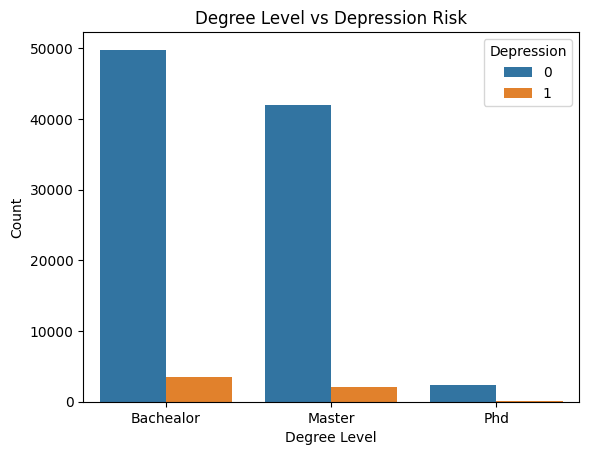

In [53]:
sn.countplot(x='Degree', hue='Depression', data=emp_trainset)
plt.title('Degree Level vs Depression Risk')
plt.xlabel('Degree Level')
plt.ylabel('Count')
plt.show()

In [54]:
empdegree_mapping = {
    'Bachealor' : 2,
    'Master': 1,
    'Phd':0
}

# Veriye uygulama
emp_trainset['Degree'] = emp_trainset['Degree'].map(empdegree_mapping)

In [55]:
emp_trainset.sample(5)

,Gender,Age,City,Profession,Work Pressure,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
22051,Female,38.0,27,26,2.0,5.0,2,1,1.0,No,0.0,1.0,Yes,0
132321,Male,55.0,4,14,2.0,4.0,2,2,1.0,No,5.0,3.0,Yes,0
34843,Male,35.0,21,30,3.0,2.0,1,2,1.0,Yes,9.0,1.0,No,0
721,Female,43.0,27,2,2.0,3.0,4,2,2.0,Yes,6.0,4.0,No,0
73347,Female,30.0,10,9,5.0,1.0,2,2,1.0,Yes,7.0,2.0,No,0


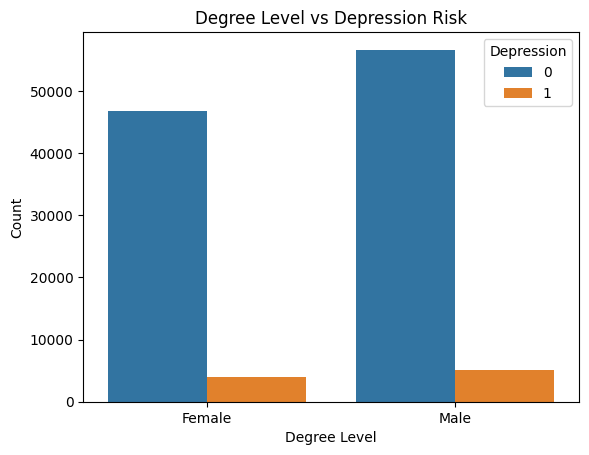

In [56]:
sn.countplot(x='Gender', hue='Depression', data=emp_trainset)
plt.title('Degree Level vs Depression Risk')
plt.xlabel('Degree Level')
plt.ylabel('Count')
plt.show()

In [57]:
empdegree_mapping = {
    'Female' : 1,
    'Male': 0,
}

# Veriye uygulama
emp_trainset['Gender'] = emp_trainset['Gender'].map(empdegree_mapping)

In [58]:
emp_trainset.sample(5)

,Gender,Age,City,Profession,Work Pressure,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
27705,0,37.0,16,27,5.0,1.0,4,1,1.0,Yes,11.0,4.0,Yes,1
14021,1,57.0,2,8,1.0,2.0,4,2,2.0,Yes,10.0,5.0,No,0
101277,0,26.0,20,2,1.0,5.0,4,0,0.0,Yes,9.0,5.0,No,0
14289,0,38.0,8,33,3.0,2.0,1,0,1.0,No,7.0,5.0,Yes,0
44908,0,47.0,27,33,1.0,3.0,4,0,2.0,No,12.0,4.0,No,0


In [59]:
empever_mapping = {
    'Yes' : 1,
    'No': 0
}

# Veriye uygulama
emp_trainset['Have you ever had suicidal thoughts ?'] = emp_trainset['Have you ever had suicidal thoughts ?'].map(empever_mapping)

In [60]:
empfamily_mapping = {
    'Yes' : 1,
    'No': 0
}

# Veriye uygulama
emp_trainset['Family History of Mental Illness'] = emp_trainset['Family History of Mental Illness'].map(empfamily_mapping)

In [61]:
emp_trainset.sample(5)

,Gender,Age,City,Profession,Work Pressure,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
51895,1,51.0,7,7,3.0,1.0,3,2,1.0,1,0.0,5.0,1,0
23044,0,35.0,27,30,2.0,3.0,1,2,2.0,0,4.0,5.0,0,0
75799,1,48.0,6,12,2.0,4.0,4,1,1.0,1,11.0,2.0,0,0
91044,0,53.0,16,10,1.0,1.0,1,0,2.0,1,4.0,1.0,0,0
72491,1,54.0,11,26,3.0,5.0,4,2,1.0,0,11.0,1.0,0,0


In [62]:
depression_distribution = emp_trainset['Depression'].value_counts(normalize=True) * 100
print(depression_distribution)

Depression
0    91.814242
1     8.185758
Name: proportion, dtype: float64


In [63]:
empnull_columns = emp_trainset.isna().sum()
empnull_columns = empnull_columns[empnull_columns > 0]
empnull_columns

Work Pressure          14
Job Satisfaction       11
Degree              12770
Financial Stress        1
dtype: int64

In [64]:
emp_trainset.shape

(112598, 14)

In [65]:
# Work Pressure veya Job Satisfaction sütunları null olan satırları silme
emp_trainset = emp_trainset.dropna(subset=['Work Pressure', 'Job Satisfaction', 'Financial Stress','Degree'])

# Sonucu kontrol etme
emp_trainset.shape

(99823, 14)

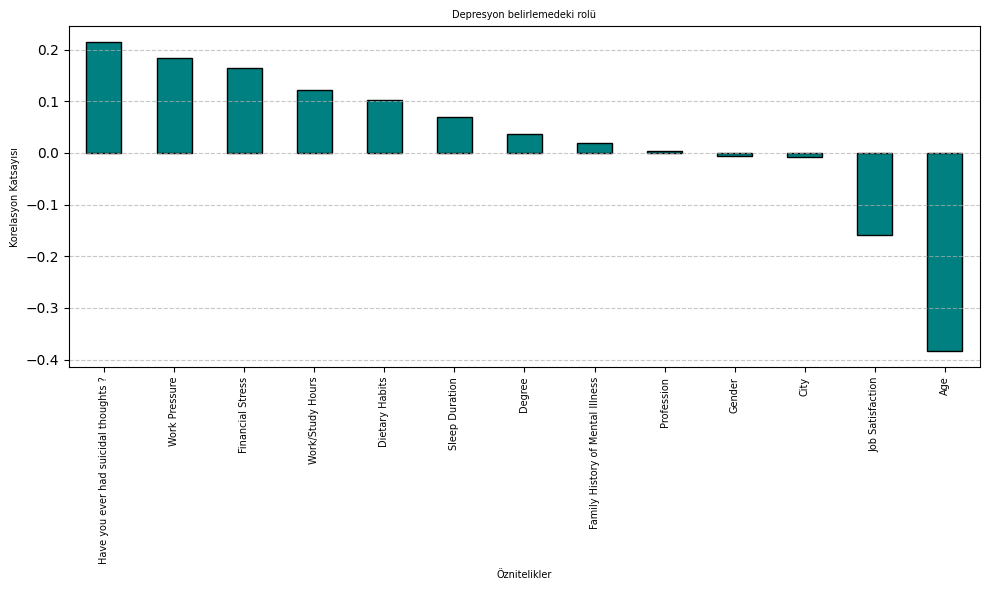

In [66]:
# Depresyon ile diğer özniteliklerin korelasyonunu hesaplama
correlation_with_target = emp_trainset.corr()["Depression"].drop("Depression")

# Bar grafiği ile görselleştirme
plt.figure(figsize=(10, 6))
correlation_with_target.sort_values(ascending=False).plot(kind="bar", color="teal", edgecolor="black")
plt.title("Depresyon belirlemedeki rolü", fontsize=7)
plt.xlabel("Öznitelikler", fontsize=7)
plt.ylabel("Korelasyon Katsayısı", fontsize=7)
plt.xticks(rotation=90, fontsize=7)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

In [67]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(emp_trainset, test_size=0.3, random_state=42)

# Define the features (X) and target variable (y)
X_train = train_set.drop(columns=['Depression'])
y_train = train_set['Depression']
X_test = test_set.drop(columns=['Depression'])
y_test = test_set['Depression']


In [68]:
from lightgbm import early_stopping, log_evaluation
from sklearn.metrics import accuracy_score
from lightgbm import LGBMClassifier
import optuna

def objective(trial):
    params = {
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.1, log=True),
        'num_leaves': trial.suggest_int('num_leaves', 50, 200),
        'feature_fraction': trial.suggest_float('feature_fraction', 0.6, 0.9),
        'bagging_fraction': trial.suggest_float('bagging_fraction', 0.6, 0.9),
        'max_depth': trial.suggest_int('max_depth', 3, 12),
        'lambda_l1': trial.suggest_float('lambda_l1', 1e-8, 10.0, log=True),
        'lambda_l2': trial.suggest_float('lambda_l2', 1e-8, 10.0, log=True),
        'min_child_samples': trial.suggest_int('min_child_samples', 20, 100)
    }

    model = LGBMClassifier(**params, n_estimators=1000, random_state=42)

    model.fit(X_train, y_train, eval_set=[(X_test, y_test)], eval_metric='binary_error',
              callbacks=[early_stopping(stopping_rounds=50), log_evaluation(10)])

    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

# Optuna optimize function
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

# Get best parameters
best_params = study.best_params
print("Best parameters:", best_params)

C:\Users\ulasu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[I 2025-01-03 12:50:55,367] A new study created in memory with name: no-name-69e2bcbe-e21c-4ccf-b70b-aa6e75ccbb91


[LightGBM] [Warning] feature_fraction is set=0.7795746338882508, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7795746338882508
[LightGBM] [Warning] lambda_l1 is set=1.4633681776039061e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.4633681776039061e-08
[LightGBM] [Warning] lambda_l2 is set=0.22068218236880124, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.22068218236880124
[LightGBM] [Warning] bagging_fraction is set=0.6523871974585632, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6523871974585632
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.7795746338882508, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7795746338882508
[LightGBM] [Warning] lambda_l1 is set=1.4633681776039061e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.4633681776039061e-08
[LightGBM] [Warning] lambda_l2 is set=0.2206821

[I 2025-01-03 12:50:58,312] Trial 0 finished with value: 0.968110328246569 and parameters: {'learning_rate': 0.021545805851534237, 'num_leaves': 96, 'feature_fraction': 0.7795746338882508, 'bagging_fraction': 0.6523871974585632, 'max_depth': 3, 'lambda_l1': 1.4633681776039061e-08, 'lambda_l2': 0.22068218236880124, 'min_child_samples': 53}. Best is trial 0 with value: 0.968110328246569.


[LightGBM] [Warning] feature_fraction is set=0.7029887295787082, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7029887295787082
[LightGBM] [Warning] lambda_l1 is set=1.8195082912396102e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.8195082912396102e-06
[LightGBM] [Warning] lambda_l2 is set=0.0006331403544780117, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0006331403544780117
[LightGBM] [Warning] bagging_fraction is set=0.7892673692943905, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7892673692943905
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.7029887295787082, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7029887295787082
[LightGBM] [Warning] lambda_l1 is set=1.8195082912396102e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.8195082912396102e-06
[LightGBM] [Warning] lambda_l2 is set=0.000

[I 2025-01-03 12:51:00,313] Trial 1 finished with value: 0.9679099742879086 and parameters: {'learning_rate': 0.034582618119369045, 'num_leaves': 81, 'feature_fraction': 0.7029887295787082, 'bagging_fraction': 0.7892673692943905, 'max_depth': 9, 'lambda_l1': 1.8195082912396102e-06, 'lambda_l2': 0.0006331403544780117, 'min_child_samples': 94}. Best is trial 0 with value: 0.968110328246569.


[LightGBM] [Warning] feature_fraction is set=0.7029887295787082, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7029887295787082
[LightGBM] [Warning] lambda_l1 is set=1.8195082912396102e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.8195082912396102e-06
[LightGBM] [Warning] lambda_l2 is set=0.0006331403544780117, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0006331403544780117
[LightGBM] [Warning] bagging_fraction is set=0.7892673692943905, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7892673692943905
[LightGBM] [Warning] feature_fraction is set=0.8643055608482899, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8643055608482899
[LightGBM] [Warning] lambda_l1 is set=1.217472582632475e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.217472582632475e-05
[LightGBM] [Warning] lambda_l2 is set=6.614420842179677e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=6.61442

[I 2025-01-03 12:51:02,003] Trial 2 finished with value: 0.9680769359201256 and parameters: {'learning_rate': 0.035912689662142845, 'num_leaves': 97, 'feature_fraction': 0.8643055608482899, 'bagging_fraction': 0.7555058944720511, 'max_depth': 3, 'lambda_l1': 1.217472582632475e-05, 'lambda_l2': 6.614420842179677e-08, 'min_child_samples': 51}. Best is trial 0 with value: 0.968110328246569.


[LightGBM] [Warning] feature_fraction is set=0.8643055608482899, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8643055608482899
[LightGBM] [Warning] lambda_l1 is set=1.217472582632475e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.217472582632475e-05
[LightGBM] [Warning] lambda_l2 is set=6.614420842179677e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=6.614420842179677e-08
[LightGBM] [Warning] bagging_fraction is set=0.7555058944720511, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7555058944720511
[LightGBM] [Warning] feature_fraction is set=0.6861174548010458, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6861174548010458
[LightGBM] [Warning] lambda_l1 is set=4.254207363621511e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.254207363621511e-07
[LightGBM] [Warning] lambda_l2 is set=3.260026758744621e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.2600267

[I 2025-01-03 12:51:02,355] Trial 3 finished with value: 0.9422312752529469 and parameters: {'learning_rate': 0.010106712925680729, 'num_leaves': 86, 'feature_fraction': 0.6861174548010458, 'bagging_fraction': 0.8779172148304804, 'max_depth': 4, 'lambda_l1': 4.254207363621511e-07, 'lambda_l2': 3.260026758744621e-07, 'min_child_samples': 34}. Best is trial 0 with value: 0.968110328246569.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[50]	valid_0's binary_error: 0.0577687	valid_0's binary_logloss: 0.149034
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Early stopping, best iteration is:
[1]	valid_0's binary_error: 0.0577687	valid_0's binary_logloss: 0.216945
[LightGBM] [Warning] feature_fraction is set=0.6861174548010458, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.686117

[I 2025-01-03 12:51:03,339] Trial 4 finished with value: 0.9677096203292483 and parameters: {'learning_rate': 0.07129470171178681, 'num_leaves': 147, 'feature_fraction': 0.8796350161186939, 'bagging_fraction': 0.7597578740756779, 'max_depth': 11, 'lambda_l1': 9.541171729460808e-05, 'lambda_l2': 0.9322992250259403, 'min_child_samples': 68}. Best is trial 0 with value: 0.968110328246569.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Early stopping, best iteration is:
[45]	valid_0's binary_error: 0.0322904	valid_0's binary_logloss: 0.0923706
[LightGBM] [Warning] feature_fraction is set=0.8796350161186939, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8796350161186939
[LightGBM] [Warning] lambda_l1 is set=9.541171729460808e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=9.541171729460808e-05
[LightGBM] [Warning] lambda_l2 is set=0.9322992250259403, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.9322992250259403
[LightGBM] [Warning] bagging_fraction is set=0.7597578740756779, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7597578740756779
[LightGBM] [Warning] feature_fraction is set=0.8636439431167415, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8636439431167415
[LightGBM] [Warning] lambda_l1 is set=6.360040652189079e-05, reg_alpha=0.0 will be igno

[I 2025-01-03 12:51:04,499] Trial 5 finished with value: 0.9677430126556917 and parameters: {'learning_rate': 0.03459510940122514, 'num_leaves': 62, 'feature_fraction': 0.8636439431167415, 'bagging_fraction': 0.7351379935643597, 'max_depth': 12, 'lambda_l1': 6.360040652189079e-05, 'lambda_l2': 4.749240261556633e-07, 'min_child_samples': 44}. Best is trial 0 with value: 0.968110328246569.


[LightGBM] [Warning] feature_fraction is set=0.755017681547185, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.755017681547185
[LightGBM] [Warning] lambda_l1 is set=0.010702269960340828, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.010702269960340828
[LightGBM] [Warning] lambda_l2 is set=6.236962977270366e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=6.236962977270366e-05
[LightGBM] [Warning] bagging_fraction is set=0.7311731380880191, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7311731380880191
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.755017681547185, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.755017681547185
[LightGBM] [Warning] lambda_l1 is set=0.010702269960340828, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.010702269960340828
[LightGBM] [Warning] lambda_l2 is set=6.236962977270366

[I 2025-01-03 12:51:05,993] Trial 6 finished with value: 0.9679767589407954 and parameters: {'learning_rate': 0.031077785827172338, 'num_leaves': 154, 'feature_fraction': 0.755017681547185, 'bagging_fraction': 0.7311731380880191, 'max_depth': 6, 'lambda_l1': 0.010702269960340828, 'lambda_l2': 6.236962977270366e-05, 'min_child_samples': 27}. Best is trial 0 with value: 0.968110328246569.


[LightGBM] [Warning] feature_fraction is set=0.6557673031102099, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6557673031102099
[LightGBM] [Warning] lambda_l1 is set=1.4165829345034467e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.4165829345034467e-07
[LightGBM] [Warning] lambda_l2 is set=9.88286475243836e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=9.88286475243836e-08
[LightGBM] [Warning] bagging_fraction is set=0.8441405634734638, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8441405634734638
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.6557673031102099, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6557673031102099
[LightGBM] [Warning] lambda_l1 is set=1.4165829345034467e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.4165829345034467e-07
[LightGBM] [Warning] lambda_l2 is set=9.88286

[I 2025-01-03 12:51:07,502] Trial 7 finished with value: 0.9677764049821351 and parameters: {'learning_rate': 0.035591593894964635, 'num_leaves': 103, 'feature_fraction': 0.6557673031102099, 'bagging_fraction': 0.8441405634734638, 'max_depth': 7, 'lambda_l1': 1.4165829345034467e-07, 'lambda_l2': 9.88286475243836e-08, 'min_child_samples': 92}. Best is trial 0 with value: 0.968110328246569.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[180]	valid_0's binary_error: 0.0324573	valid_0's binary_logloss: 0.0892564
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Early stopping, best iteration is:
[135]	valid_0's binary_error: 0.0322236	valid_0's binary_logloss: 0.0897533
[LightGBM] [Warning] feature_fraction is set=0.6557673031102099, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6557673031102099
[LightGBM] [Warning] lambda_l1 is set=1.4165829345034467e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.41658293450344

[I 2025-01-03 12:51:09,840] Trial 8 finished with value: 0.9685778208167763 and parameters: {'learning_rate': 0.02542890581546485, 'num_leaves': 111, 'feature_fraction': 0.7423224895067807, 'bagging_fraction': 0.6063683417788193, 'max_depth': 11, 'lambda_l1': 0.0005767459479579007, 'lambda_l2': 2.9115615254018675e-06, 'min_child_samples': 45}. Best is trial 8 with value: 0.9685778208167763.


[LightGBM] [Warning] feature_fraction is set=0.8603336678488236, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8603336678488236
[LightGBM] [Warning] lambda_l1 is set=0.005429657932613979, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.005429657932613979
[LightGBM] [Warning] lambda_l2 is set=6.272360632453748e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=6.272360632453748e-06
[LightGBM] [Warning] bagging_fraction is set=0.7956579033138144, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7956579033138144
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.8603336678488236, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8603336678488236
[LightGBM] [Warning] lambda_l1 is set=0.005429657932613979, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.005429657932613979
[LightGBM] [Warning] lambda_l2 is set=6.27236063245

[I 2025-01-03 12:51:10,312] Trial 9 finished with value: 0.9422312752529469 and parameters: {'learning_rate': 0.011244313465357685, 'num_leaves': 91, 'feature_fraction': 0.8603336678488236, 'bagging_fraction': 0.7956579033138144, 'max_depth': 8, 'lambda_l1': 0.005429657932613979, 'lambda_l2': 6.272360632453748e-06, 'min_child_samples': 73}. Best is trial 8 with value: 0.9685778208167763.


[50]	valid_0's binary_error: 0.0577687	valid_0's binary_logloss: 0.13508
Early stopping, best iteration is:
[1]	valid_0's binary_error: 0.0577687	valid_0's binary_logloss: 0.21582
[LightGBM] [Warning] feature_fraction is set=0.8603336678488236, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8603336678488236
[LightGBM] [Warning] lambda_l1 is set=0.005429657932613979, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.005429657932613979
[LightGBM] [Warning] lambda_l2 is set=6.272360632453748e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=6.272360632453748e-06
[LightGBM] [Warning] bagging_fraction is set=0.7956579033138144, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7956579033138144
[LightGBM] [Warning] feature_fraction is set=0.7945101943033341, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7945101943033341
[LightGBM] [Warning] lambda_l1 is set=0.08906123075644357, reg_alpha=0.0 will be ignored

[I 2025-01-03 12:51:11,589] Trial 10 finished with value: 0.9669082044946071 and parameters: {'learning_rate': 0.08978931434811786, 'num_leaves': 187, 'feature_fraction': 0.7945101943033341, 'bagging_fraction': 0.6139455576160083, 'max_depth': 10, 'lambda_l1': 0.08906123075644357, 'lambda_l2': 0.0035368037425595536, 'min_child_samples': 24}. Best is trial 8 with value: 0.9685778208167763.


[LightGBM] [Warning] feature_fraction is set=0.7772292792101516, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7772292792101516
[LightGBM] [Warning] lambda_l1 is set=7.543888422467773, reg_alpha=0.0 will be ignored. Current value: lambda_l1=7.543888422467773
[LightGBM] [Warning] lambda_l2 is set=4.084603907693826, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.084603907693826
[LightGBM] [Warning] bagging_fraction is set=0.6002184976858769, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6002184976858769
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.7772292792101516, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7772292792101516
[LightGBM] [Warning] lambda_l1 is set=7.543888422467773, reg_alpha=0.0 will be ignored. Current value: lambda_l1=7.543888422467773
[LightGBM] [Warning] lambda_l2 is set=4.084603907693826, reg_lambda=0.0

[I 2025-01-03 12:51:13,528] Trial 11 finished with value: 0.9677430126556917 and parameters: {'learning_rate': 0.01911477135880667, 'num_leaves': 125, 'feature_fraction': 0.7772292792101516, 'bagging_fraction': 0.6002184976858769, 'max_depth': 6, 'lambda_l1': 7.543888422467773, 'lambda_l2': 4.084603907693826, 'min_child_samples': 56}. Best is trial 8 with value: 0.9685778208167763.


[LightGBM] [Warning] feature_fraction is set=0.7772292792101516, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7772292792101516
[LightGBM] [Warning] lambda_l1 is set=7.543888422467773, reg_alpha=0.0 will be ignored. Current value: lambda_l1=7.543888422467773
[LightGBM] [Warning] lambda_l2 is set=4.084603907693826, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.084603907693826
[LightGBM] [Warning] bagging_fraction is set=0.6002184976858769, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6002184976858769
[LightGBM] [Warning] feature_fraction is set=0.8030776132285931, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8030776132285931
[LightGBM] [Warning] lambda_l1 is set=1.1987911516396463e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.1987911516396463e-08
[LightGBM] [Warning] lambda_l2 is set=0.09070945621250502, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.09070945621250502
[Ligh

[I 2025-01-03 12:51:15,474] Trial 12 finished with value: 0.9677096203292483 and parameters: {'learning_rate': 0.0196293001173256, 'num_leaves': 127, 'feature_fraction': 0.8030776132285931, 'bagging_fraction': 0.6593719021280656, 'max_depth': 4, 'lambda_l1': 1.1987911516396463e-08, 'lambda_l2': 0.09070945621250502, 'min_child_samples': 41}. Best is trial 8 with value: 0.9685778208167763.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[350]	valid_0's binary_error: 0.0324239	valid_0's binary_logloss: 0.089599
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Early stopping, best iteration is:
[301]	valid_0's binary_error: 0.0322904	valid_0's binary_logloss: 0.0903568
[LightGBM] [Warning] feature_fraction is set=0.8030776132285931, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8030776132285931
[LightGBM] [Warning] lambda_l1 is set=1.1987911516396463e-08

[I 2025-01-03 12:51:18,472] Trial 13 finished with value: 0.9684442515110028 and parameters: {'learning_rate': 0.021183454511826353, 'num_leaves': 59, 'feature_fraction': 0.6152854427236684, 'bagging_fraction': 0.6671173344997272, 'max_depth': 12, 'lambda_l1': 0.0017197168361740877, 'lambda_l2': 0.015646089019048282, 'min_child_samples': 68}. Best is trial 8 with value: 0.9685778208167763.


[LightGBM] [Warning] feature_fraction is set=0.6101815325341848, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6101815325341848
[LightGBM] [Warning] lambda_l1 is set=0.0010778960371225761, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0010778960371225761
[LightGBM] [Warning] lambda_l2 is set=0.004806809166746844, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.004806809166746844
[LightGBM] [Warning] bagging_fraction is set=0.6806735181047491, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6806735181047491
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.6101815325341848, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6101815325341848
[LightGBM] [Warning] lambda_l1 is set=0.0010778960371225761, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0010778960371225761
[LightGBM] [Warning] lambda_l2 is set=0.004806809

[I 2025-01-03 12:51:21,037] Trial 14 finished with value: 0.9679099742879086 and parameters: {'learning_rate': 0.015040574598227826, 'num_leaves': 56, 'feature_fraction': 0.6101815325341848, 'bagging_fraction': 0.6806735181047491, 'max_depth': 12, 'lambda_l1': 0.0010778960371225761, 'lambda_l2': 0.004806809166746844, 'min_child_samples': 77}. Best is trial 8 with value: 0.9685778208167763.


[LightGBM] [Warning] feature_fraction is set=0.6033784051066577, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6033784051066577
[LightGBM] [Warning] lambda_l1 is set=0.34891581044871933, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.34891581044871933
[LightGBM] [Warning] lambda_l2 is set=1.70807273830385e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.70807273830385e-05
[LightGBM] [Warning] bagging_fraction is set=0.6870647299687926, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6870647299687926
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.6033784051066577, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6033784051066577
[LightGBM] [Warning] lambda_l1 is set=0.34891581044871933, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.34891581044871933
[LightGBM] [Warning] lambda_l2 is set=1.70807273830385e-0

[I 2025-01-03 12:51:23,037] Trial 15 finished with value: 0.9674090893912579 and parameters: {'learning_rate': 0.049378038644028496, 'num_leaves': 195, 'feature_fraction': 0.6033784051066577, 'bagging_fraction': 0.6870647299687926, 'max_depth': 10, 'lambda_l1': 0.34891581044871933, 'lambda_l2': 1.70807273830385e-05, 'min_child_samples': 65}. Best is trial 8 with value: 0.9685778208167763.


[LightGBM] [Warning] feature_fraction is set=0.7079182062267702, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7079182062267702
[LightGBM] [Warning] lambda_l1 is set=0.0006290333172160538, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0006290333172160538
[LightGBM] [Warning] lambda_l2 is set=0.018528410206862155, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.018528410206862155
[LightGBM] [Warning] bagging_fraction is set=0.6338507595340849, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6338507595340849
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.7079182062267702, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7079182062267702
[LightGBM] [Warning] lambda_l1 is set=0.0006290333172160538, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0006290333172160538
[LightGBM] [Warning] lambda_l2 is set=0.018528410

[I 2025-01-03 12:51:26,105] Trial 16 finished with value: 0.9680769359201256 and parameters: {'learning_rate': 0.025058921078895385, 'num_leaves': 113, 'feature_fraction': 0.7079182062267702, 'bagging_fraction': 0.6338507595340849, 'max_depth': 11, 'lambda_l1': 0.0006290333172160538, 'lambda_l2': 0.018528410206862155, 'min_child_samples': 79}. Best is trial 8 with value: 0.9685778208167763.


[LightGBM] [Warning] feature_fraction is set=0.6504853116908993, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6504853116908993
[LightGBM] [Warning] lambda_l1 is set=0.027904176242298132, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.027904176242298132
[LightGBM] [Warning] lambda_l2 is set=0.00022776011365047635, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.00022776011365047635
[LightGBM] [Warning] bagging_fraction is set=0.6919415923252704, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6919415923252704
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.6504853116908993, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6504853116908993
[LightGBM] [Warning] lambda_l1 is set=0.027904176242298132, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.027904176242298132
[LightGBM] [Warning] lambda_l2 is set=0.000227760

[I 2025-01-03 12:51:29,378] Trial 17 finished with value: 0.967943366614352 and parameters: {'learning_rate': 0.014462107351339595, 'num_leaves': 72, 'feature_fraction': 0.6504853116908993, 'bagging_fraction': 0.6919415923252704, 'max_depth': 12, 'lambda_l1': 0.027904176242298132, 'lambda_l2': 0.00022776011365047635, 'min_child_samples': 82}. Best is trial 8 with value: 0.9685778208167763.


[LightGBM] [Warning] feature_fraction is set=0.726232721179364, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.726232721179364
[LightGBM] [Warning] lambda_l1 is set=0.6995655871612558, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6995655871612558
[LightGBM] [Warning] lambda_l2 is set=2.4914943257681867e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.4914943257681867e-06
[LightGBM] [Warning] bagging_fraction is set=0.6332202050636071, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6332202050636071
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.726232721179364, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.726232721179364
[LightGBM] [Warning] lambda_l1 is set=0.6995655871612558, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6995655871612558
[LightGBM] [Warning] lambda_l2 is set=2.4914943257681867e-06,

[I 2025-01-03 12:51:31,117] Trial 18 finished with value: 0.967509266370588 and parameters: {'learning_rate': 0.0586502205235588, 'num_leaves': 151, 'feature_fraction': 0.726232721179364, 'bagging_fraction': 0.6332202050636071, 'max_depth': 10, 'lambda_l1': 0.6995655871612558, 'lambda_l2': 2.4914943257681867e-06, 'min_child_samples': 61}. Best is trial 8 with value: 0.9685778208167763.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Early stopping, best iteration is:
[107]	valid_0's binary_error: 0.0324907	valid_0's binary_logloss: 0.0901107
[LightGBM] [Warning] feature_fraction is set=0.726232721179364, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.726232721179364
[LightGBM] [Warning] lambda_l1 is set=0.6995655871612558, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6995655871612558
[LightGBM] [Warning] lambda_l2 is set=2.4914943257681867e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.4914943257681867e-06
[LightGBM] [Warning] bagging_fraction is set=0.6332202050636071, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6332202050636071
[LightGBM] [Warning] feature_fraction is set=0.8254004779048337, colsample_bytree=1.0 will

[I 2025-01-03 12:51:33,775] Trial 19 finished with value: 0.9673089124119277 and parameters: {'learning_rate': 0.014906652315901889, 'num_leaves': 172, 'feature_fraction': 0.8254004779048337, 'bagging_fraction': 0.6024302978507415, 'max_depth': 9, 'lambda_l1': 8.07777834276839e-06, 'lambda_l2': 0.0006595559019875424, 'min_child_samples': 44}. Best is trial 8 with value: 0.9685778208167763.


[LightGBM] [Warning] feature_fraction is set=0.8254004779048337, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8254004779048337
[LightGBM] [Warning] lambda_l1 is set=8.07777834276839e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=8.07777834276839e-06
[LightGBM] [Warning] lambda_l2 is set=0.0006595559019875424, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0006595559019875424
[LightGBM] [Warning] bagging_fraction is set=0.6024302978507415, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6024302978507415
[LightGBM] [Warning] feature_fraction is set=0.6527254622080043, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6527254622080043
[LightGBM] [Warning] lambda_l1 is set=0.0021473439559623014, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0021473439559623014
[LightGBM] [Warning] lambda_l2 is set=5.0424028315117256e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5.04240283

[I 2025-01-03 12:51:36,051] Trial 20 finished with value: 0.968110328246569 and parameters: {'learning_rate': 0.026456329843714373, 'num_leaves': 71, 'feature_fraction': 0.6527254622080043, 'bagging_fraction': 0.6950573457232766, 'max_depth': 11, 'lambda_l1': 0.0021473439559623014, 'lambda_l2': 5.0424028315117256e-05, 'min_child_samples': 85}. Best is trial 8 with value: 0.9685778208167763.


[LightGBM] [Warning] feature_fraction is set=0.7417036478769176, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7417036478769176
[LightGBM] [Warning] lambda_l1 is set=0.00013748550986063905, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00013748550986063905
[LightGBM] [Warning] lambda_l2 is set=0.1291354111182703, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1291354111182703
[LightGBM] [Warning] bagging_fraction is set=0.6509575632908006, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6509575632908006
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.7417036478769176, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7417036478769176
[LightGBM] [Warning] lambda_l1 is set=0.00013748550986063905, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00013748550986063905
[LightGBM] [Warning] lambda_l2 is set=0.129135411

[I 2025-01-03 12:51:37,643] Trial 21 finished with value: 0.9681771128994557 and parameters: {'learning_rate': 0.022444415658144812, 'num_leaves': 115, 'feature_fraction': 0.7417036478769176, 'bagging_fraction': 0.6509575632908006, 'max_depth': 5, 'lambda_l1': 0.00013748550986063905, 'lambda_l2': 0.1291354111182703, 'min_child_samples': 53}. Best is trial 8 with value: 0.9685778208167763.


[LightGBM] [Warning] feature_fraction is set=0.7488282109309918, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7488282109309918
[LightGBM] [Warning] lambda_l1 is set=0.0001681700183490308, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0001681700183490308
[LightGBM] [Warning] lambda_l2 is set=0.04761315917287499, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.04761315917287499
[LightGBM] [Warning] bagging_fraction is set=0.6553130468910696, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6553130468910696
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.7488282109309918, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7488282109309918
[LightGBM] [Warning] lambda_l1 is set=0.0001681700183490308, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0001681700183490308
[LightGBM] [Warning] lambda_l2 is set=0.04761315917

[I 2025-01-03 12:51:39,340] Trial 22 finished with value: 0.968110328246569 and parameters: {'learning_rate': 0.02392455238254436, 'num_leaves': 135, 'feature_fraction': 0.7488282109309918, 'bagging_fraction': 0.6553130468910696, 'max_depth': 5, 'lambda_l1': 0.0001681700183490308, 'lambda_l2': 0.04761315917287499, 'min_child_samples': 36}. Best is trial 8 with value: 0.9685778208167763.


[260]	valid_0's binary_error: 0.0320232	valid_0's binary_logloss: 0.0894491
Early stopping, best iteration is:
[210]	valid_0's binary_error: 0.0318897	valid_0's binary_logloss: 0.0904331
[LightGBM] [Warning] feature_fraction is set=0.7488282109309918, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7488282109309918
[LightGBM] [Warning] lambda_l1 is set=0.0001681700183490308, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0001681700183490308
[LightGBM] [Warning] lambda_l2 is set=0.04761315917287499, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.04761315917287499
[LightGBM] [Warning] bagging_fraction is set=0.6553130468910696, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6553130468910696
[LightGBM] [Warning] feature_fraction is set=0.7403578973950936, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7403578973950936
[LightGBM] [Warning] lambda_l1 is set=1.5924461807102547e-05, reg_alpha=0.0 will be

[I 2025-01-03 12:51:42,090] Trial 23 finished with value: 0.967943366614352 and parameters: {'learning_rate': 0.018076349514293065, 'num_leaves': 115, 'feature_fraction': 0.7403578973950936, 'bagging_fraction': 0.6265362614802464, 'max_depth': 8, 'lambda_l1': 1.5924461807102547e-05, 'lambda_l2': 9.074705019639126, 'min_child_samples': 50}. Best is trial 8 with value: 0.9685778208167763.


[LightGBM] [Warning] feature_fraction is set=0.6776227310520818, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6776227310520818
[LightGBM] [Warning] lambda_l1 is set=0.00033426323944398776, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00033426323944398776
[LightGBM] [Warning] lambda_l2 is set=1.051623377687197e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.051623377687197e-08
[LightGBM] [Warning] bagging_fraction is set=0.7095435565909549, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7095435565909549
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.6776227310520818, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6776227310520818
[LightGBM] [Warning] lambda_l1 is set=0.00033426323944398776, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00033426323944398776
[LightGBM] [Warning] lambda_l2 is set=1.051

[I 2025-01-03 12:51:44,056] Trial 24 finished with value: 0.9679767589407954 and parameters: {'learning_rate': 0.028225169435350538, 'num_leaves': 111, 'feature_fraction': 0.6776227310520818, 'bagging_fraction': 0.7095435565909549, 'max_depth': 7, 'lambda_l1': 0.00033426323944398776, 'lambda_l2': 1.051623377687197e-08, 'min_child_samples': 58}. Best is trial 8 with value: 0.9685778208167763.


[LightGBM] [Warning] feature_fraction is set=0.6776227310520818, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6776227310520818
[LightGBM] [Warning] lambda_l1 is set=0.00033426323944398776, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00033426323944398776
[LightGBM] [Warning] lambda_l2 is set=1.051623377687197e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.051623377687197e-08
[LightGBM] [Warning] bagging_fraction is set=0.7095435565909549, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7095435565909549
[LightGBM] [Warning] feature_fraction is set=0.8196348536011002, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8196348536011002
[LightGBM] [Warning] lambda_l1 is set=0.0028130197827521785, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0028130197827521785
[LightGBM] [Warning] lambda_l2 is set=0.8385302112919821, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.83853021

[I 2025-01-03 12:51:45,056] Trial 25 finished with value: 0.9679099742879086 and parameters: {'learning_rate': 0.04575088642089382, 'num_leaves': 52, 'feature_fraction': 0.8196348536011002, 'bagging_fraction': 0.6632098301857191, 'max_depth': 5, 'lambda_l1': 0.0028130197827521785, 'lambda_l2': 0.8385302112919821, 'min_child_samples': 68}. Best is trial 8 with value: 0.9685778208167763.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[140]	valid_0's binary_error: 0.0322236	valid_0's binary_logloss: 0.0894738
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[150]	valid_0's binary_error: 0.0321568	valid_0's binary_logloss: 0.0892931
[LightGBM] [Warning] No

[I 2025-01-03 12:51:48,366] Trial 26 finished with value: 0.9678431896350219 and parameters: {'learning_rate': 0.017172200643458306, 'num_leaves': 162, 'feature_fraction': 0.6288462619388413, 'bagging_fraction': 0.6380232343593493, 'max_depth': 9, 'lambda_l1': 3.688773896553436e-05, 'lambda_l2': 0.0038573673579712186, 'min_child_samples': 32}. Best is trial 8 with value: 0.9685778208167763.


[LightGBM] [Warning] feature_fraction is set=0.6288462619388413, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6288462619388413
[LightGBM] [Warning] lambda_l1 is set=3.688773896553436e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.688773896553436e-05
[LightGBM] [Warning] lambda_l2 is set=0.0038573673579712186, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0038573673579712186
[LightGBM] [Warning] bagging_fraction is set=0.6380232343593493, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6380232343593493
[LightGBM] [Warning] feature_fraction is set=0.7124644496623077, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7124644496623077
[LightGBM] [Warning] lambda_l1 is set=0.044109594716884165, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.044109594716884165
[LightGBM] [Warning] lambda_l2 is set=0.023930122569221217, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0239301225

[I 2025-01-03 12:51:52,390] Trial 27 finished with value: 0.9680101512672388 and parameters: {'learning_rate': 0.012324930671468719, 'num_leaves': 137, 'feature_fraction': 0.7124644496623077, 'bagging_fraction': 0.6678637884785614, 'max_depth': 11, 'lambda_l1': 0.044109594716884165, 'lambda_l2': 0.023930122569221217, 'min_child_samples': 61}. Best is trial 8 with value: 0.9685778208167763.


[LightGBM] [Warning] feature_fraction is set=0.6870657841698193, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6870657841698193
[LightGBM] [Warning] lambda_l1 is set=3.178864365481919e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.178864365481919e-06
[LightGBM] [Warning] lambda_l2 is set=0.38070699289568277, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.38070699289568277
[LightGBM] [Warning] bagging_fraction is set=0.72461141048968, subsample=1.0 will be ignored. Current value: bagging_fraction=0.72461141048968
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.6870657841698193, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6870657841698193
[LightGBM] [Warning] lambda_l1 is set=3.178864365481919e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.178864365481919e-06
[LightGBM] [Warning] lambda_l2 is set=0.380706992895682

[I 2025-01-03 12:51:54,661] Trial 28 finished with value: 0.9682438975523425 and parameters: {'learning_rate': 0.024549855821519768, 'num_leaves': 69, 'feature_fraction': 0.6870657841698193, 'bagging_fraction': 0.72461141048968, 'max_depth': 12, 'lambda_l1': 3.178864365481919e-06, 'lambda_l2': 0.38070699289568277, 'min_child_samples': 47}. Best is trial 8 with value: 0.9685778208167763.


[LightGBM] [Warning] feature_fraction is set=0.6766476994204501, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6766476994204501
[LightGBM] [Warning] lambda_l1 is set=8.022605632594839e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=8.022605632594839e-08
[LightGBM] [Warning] lambda_l2 is set=0.657649603364029, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.657649603364029
[LightGBM] [Warning] bagging_fraction is set=0.7133066619650942, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7133066619650942
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.6766476994204501, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6766476994204501
[LightGBM] [Warning] lambda_l1 is set=8.022605632594839e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=8.022605632594839e-08
[LightGBM] [Warning] lambda_l2 is set=0.657649603364029

[I 2025-01-03 12:51:56,009] Trial 29 finished with value: 0.9676428356763616 and parameters: {'learning_rate': 0.04326717237607184, 'num_leaves': 73, 'feature_fraction': 0.6766476994204501, 'bagging_fraction': 0.7133066619650942, 'max_depth': 12, 'lambda_l1': 8.022605632594839e-08, 'lambda_l2': 0.657649603364029, 'min_child_samples': 47}. Best is trial 8 with value: 0.9685778208167763.


[LightGBM] [Warning] feature_fraction is set=0.6299427465857284, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6299427465857284
[LightGBM] [Warning] lambda_l1 is set=2.0139562382156618e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.0139562382156618e-06
[LightGBM] [Warning] lambda_l2 is set=0.009953899899133593, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.009953899899133593
[LightGBM] [Warning] bagging_fraction is set=0.7964838057383448, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7964838057383448
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.6299427465857284, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6299427465857284
[LightGBM] [Warning] lambda_l1 is set=2.0139562382156618e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.0139562382156618e-06
[LightGBM] [Warning] lambda_l2 is set=0.00995

[I 2025-01-03 12:51:58,680] Trial 30 finished with value: 0.968110328246569 and parameters: {'learning_rate': 0.021398833916098828, 'num_leaves': 64, 'feature_fraction': 0.6299427465857284, 'bagging_fraction': 0.7964838057383448, 'max_depth': 11, 'lambda_l1': 2.0139562382156618e-06, 'lambda_l2': 0.009953899899133593, 'min_child_samples': 42}. Best is trial 8 with value: 0.9685778208167763.


[LightGBM] [Warning] feature_fraction is set=0.7679082668467317, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7679082668467317
[LightGBM] [Warning] lambda_l1 is set=1.8199842014541989e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.8199842014541989e-06
[LightGBM] [Warning] lambda_l2 is set=0.1607604160503463, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1607604160503463
[LightGBM] [Warning] bagging_fraction is set=0.6502989699239746, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6502989699239746
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.7679082668467317, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7679082668467317
[LightGBM] [Warning] lambda_l1 is set=1.8199842014541989e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.8199842014541989e-06
[LightGBM] [Warning] lambda_l2 is set=0.160760416

[I 2025-01-03 12:52:00,717] Trial 31 finished with value: 0.9680769359201256 and parameters: {'learning_rate': 0.023217594005401892, 'num_leaves': 101, 'feature_fraction': 0.7679082668467317, 'bagging_fraction': 0.6502989699239746, 'max_depth': 12, 'lambda_l1': 1.8199842014541989e-06, 'lambda_l2': 0.1607604160503463, 'min_child_samples': 54}. Best is trial 8 with value: 0.9685778208167763.


[LightGBM] [Warning] feature_fraction is set=0.7292317482723882, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7292317482723882
[LightGBM] [Warning] lambda_l1 is set=0.0007048208273339007, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0007048208273339007
[LightGBM] [Warning] lambda_l2 is set=0.31659264293724443, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.31659264293724443
[LightGBM] [Warning] bagging_fraction is set=0.6141225384791152, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6141225384791152
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.7292317482723882, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7292317482723882
[LightGBM] [Warning] lambda_l1 is set=0.0007048208273339007, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0007048208273339007
[LightGBM] [Warning] lambda_l2 is set=0.31659264293

[I 2025-01-03 12:52:02,825] Trial 32 finished with value: 0.9680101512672388 and parameters: {'learning_rate': 0.02191094813855753, 'num_leaves': 83, 'feature_fraction': 0.7292317482723882, 'bagging_fraction': 0.6141225384791152, 'max_depth': 10, 'lambda_l1': 0.0007048208273339007, 'lambda_l2': 0.31659264293724443, 'min_child_samples': 50}. Best is trial 8 with value: 0.9685778208167763.


Early stopping, best iteration is:
[179]	valid_0's binary_error: 0.0319898	valid_0's binary_logloss: 0.0906921
[LightGBM] [Warning] feature_fraction is set=0.7292317482723882, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7292317482723882
[LightGBM] [Warning] lambda_l1 is set=0.0007048208273339007, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0007048208273339007
[LightGBM] [Warning] lambda_l2 is set=0.31659264293724443, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.31659264293724443
[LightGBM] [Warning] bagging_fraction is set=0.6141225384791152, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6141225384791152
[LightGBM] [Warning] feature_fraction is set=0.6934661584621425, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6934661584621425
[LightGBM] [Warning] lambda_l1 is set=4.685679727010238e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.685679727010238e-06
[LightGBM] [Warning]

[I 2025-01-03 12:52:04,387] Trial 33 finished with value: 0.9678431896350219 and parameters: {'learning_rate': 0.029501043834568377, 'num_leaves': 50, 'feature_fraction': 0.6934661584621425, 'bagging_fraction': 0.7758600621750327, 'max_depth': 12, 'lambda_l1': 4.685679727010238e-06, 'lambda_l2': 3.264066150225093, 'min_child_samples': 38}. Best is trial 8 with value: 0.9685778208167763.


[LightGBM] [Warning] feature_fraction is set=0.7252609595470959, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7252609595470959
[LightGBM] [Warning] lambda_l1 is set=3.3787634464439015e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.3787634464439015e-05
[LightGBM] [Warning] lambda_l2 is set=0.0006618714443759154, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0006618714443759154
[LightGBM] [Warning] bagging_fraction is set=0.7123891503068555, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7123891503068555
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.7252609595470959, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7252609595470959
[LightGBM] [Warning] lambda_l1 is set=3.3787634464439015e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.3787634464439015e-05
[LightGBM] [Warning] lambda_l2 is set=0.000

[I 2025-01-03 12:52:05,634] Trial 34 finished with value: 0.9679099742879086 and parameters: {'learning_rate': 0.04050530292601728, 'num_leaves': 92, 'feature_fraction': 0.7252609595470959, 'bagging_fraction': 0.7123891503068555, 'max_depth': 3, 'lambda_l1': 3.3787634464439015e-05, 'lambda_l2': 0.0006618714443759154, 'min_child_samples': 65}. Best is trial 8 with value: 0.9685778208167763.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[260]	valid_0's binary_error: 0.0321568	valid_0's binary_logloss: 0.0889331
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No 

[I 2025-01-03 12:52:07,843] Trial 35 finished with value: 0.9678431896350219 and parameters: {'learning_rate': 0.016778901314326505, 'num_leaves': 75, 'feature_fraction': 0.7627805089279031, 'bagging_fraction': 0.6753837353141632, 'max_depth': 9, 'lambda_l1': 3.0207494909979177e-07, 'lambda_l2': 0.07744440286713336, 'min_child_samples': 53}. Best is trial 8 with value: 0.9685778208167763.


[LightGBM] [Warning] feature_fraction is set=0.6671424162527828, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6671424162527828
[LightGBM] [Warning] lambda_l1 is set=0.00016980015538248174, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00016980015538248174
[LightGBM] [Warning] lambda_l2 is set=0.0019502774213249231, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0019502774213249231
[LightGBM] [Warning] bagging_fraction is set=0.6496860923900822, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6496860923900822
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.6671424162527828, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6671424162527828
[LightGBM] [Warning] lambda_l1 is set=0.00016980015538248174, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00016980015538248174
[LightGBM] [Warning] lambda_l2 is set=0.001

[I 2025-01-03 12:52:09,751] Trial 36 finished with value: 0.9682105052258991 and parameters: {'learning_rate': 0.026819028875565476, 'num_leaves': 62, 'feature_fraction': 0.6671424162527828, 'bagging_fraction': 0.6496860923900822, 'max_depth': 11, 'lambda_l1': 0.00016980015538248174, 'lambda_l2': 0.0019502774213249231, 'min_child_samples': 30}. Best is trial 8 with value: 0.9685778208167763.


[LightGBM] [Warning] feature_fraction is set=0.6650115642731176, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6650115642731176
[LightGBM] [Warning] lambda_l1 is set=0.009687551458520191, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.009687551458520191
[LightGBM] [Warning] lambda_l2 is set=0.0001963926484367679, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0001963926484367679
[LightGBM] [Warning] bagging_fraction is set=0.7326420937169966, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7326420937169966
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.6650115642731176, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6650115642731176
[LightGBM] [Warning] lambda_l1 is set=0.009687551458520191, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.009687551458520191
[LightGBM] [Warning] lambda_l2 is set=0.00019639264

[I 2025-01-03 12:52:11,307] Trial 37 finished with value: 0.9680769359201256 and parameters: {'learning_rate': 0.032061661597169465, 'num_leaves': 64, 'feature_fraction': 0.6650115642731176, 'bagging_fraction': 0.7326420937169966, 'max_depth': 11, 'lambda_l1': 0.009687551458520191, 'lambda_l2': 0.0001963926484367679, 'min_child_samples': 20}. Best is trial 8 with value: 0.9685778208167763.


[190]	valid_0's binary_error: 0.0323238	valid_0's binary_logloss: 0.0894261
Early stopping, best iteration is:
[147]	valid_0's binary_error: 0.0319231	valid_0's binary_logloss: 0.0900214
[LightGBM] [Warning] feature_fraction is set=0.6650115642731176, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6650115642731176
[LightGBM] [Warning] lambda_l1 is set=0.009687551458520191, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.009687551458520191
[LightGBM] [Warning] lambda_l2 is set=0.0001963926484367679, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0001963926484367679
[LightGBM] [Warning] bagging_fraction is set=0.7326420937169966, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7326420937169966
[LightGBM] [Warning] feature_fraction is set=0.6294702599597203, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6294702599597203
[LightGBM] [Warning] lambda_l1 is set=1.8864294185234686e-05, reg_alpha=0.0 will 

[I 2025-01-03 12:52:13,806] Trial 38 finished with value: 0.9680101512672388 and parameters: {'learning_rate': 0.02760998959885723, 'num_leaves': 60, 'feature_fraction': 0.6294702599597203, 'bagging_fraction': 0.6216306340891877, 'max_depth': 10, 'lambda_l1': 1.8864294185234686e-05, 'lambda_l2': 0.002238994799296615, 'min_child_samples': 31}. Best is trial 8 with value: 0.9685778208167763.


[LightGBM] [Warning] feature_fraction is set=0.6917310680922896, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6917310680922896
[LightGBM] [Warning] lambda_l1 is set=4.13067683165862e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.13067683165862e-08
[LightGBM] [Warning] lambda_l2 is set=2.3157998896763984e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.3157998896763984e-06
[LightGBM] [Warning] bagging_fraction is set=0.7515836942920794, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7515836942920794
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.6917310680922896, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6917310680922896
[LightGBM] [Warning] lambda_l1 is set=4.13067683165862e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.13067683165862e-08
[LightGBM] [Warning] lambda_l2 is set=2.315799889

[I 2025-01-03 12:52:15,664] Trial 39 finished with value: 0.9682105052258991 and parameters: {'learning_rate': 0.036789411786327365, 'num_leaves': 83, 'feature_fraction': 0.6917310680922896, 'bagging_fraction': 0.7515836942920794, 'max_depth': 11, 'lambda_l1': 4.13067683165862e-08, 'lambda_l2': 2.3157998896763984e-06, 'min_child_samples': 100}. Best is trial 8 with value: 0.9685778208167763.


Early stopping, best iteration is:
[163]	valid_0's binary_error: 0.0317895	valid_0's binary_logloss: 0.0895247
[LightGBM] [Warning] feature_fraction is set=0.6917310680922896, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6917310680922896
[LightGBM] [Warning] lambda_l1 is set=4.13067683165862e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.13067683165862e-08
[LightGBM] [Warning] lambda_l2 is set=2.3157998896763984e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.3157998896763984e-06
[LightGBM] [Warning] bagging_fraction is set=0.7515836942920794, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7515836942920794
[LightGBM] [Warning] feature_fraction is set=0.6145889508416197, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6145889508416197
[LightGBM] [Warning] lambda_l1 is set=5.487735132794158e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5.487735132794158e-07
[LightGBM] [Warn

[I 2025-01-03 12:52:17,830] Trial 40 finished with value: 0.968377466858116 and parameters: {'learning_rate': 0.03348125805248713, 'num_leaves': 79, 'feature_fraction': 0.6145889508416197, 'bagging_fraction': 0.8213902210012206, 'max_depth': 12, 'lambda_l1': 5.487735132794158e-07, 'lambda_l2': 0.0008773118789200799, 'min_child_samples': 47}. Best is trial 8 with value: 0.9685778208167763.


[LightGBM] [Warning] feature_fraction is set=0.6145889508416197, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6145889508416197
[LightGBM] [Warning] lambda_l1 is set=5.487735132794158e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5.487735132794158e-07
[LightGBM] [Warning] lambda_l2 is set=0.0008773118789200799, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0008773118789200799
[LightGBM] [Warning] bagging_fraction is set=0.8213902210012206, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8213902210012206
[LightGBM] [Warning] feature_fraction is set=0.6208376086364247, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6208376086364247
[LightGBM] [Warning] lambda_l1 is set=6.583061363586745e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=6.583061363586745e-07
[LightGBM] [Warning] lambda_l2 is set=0.0010313320213451494, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0010313

[I 2025-01-03 12:52:19,685] Trial 41 finished with value: 0.9680101512672388 and parameters: {'learning_rate': 0.03202085183615301, 'num_leaves': 67, 'feature_fraction': 0.6208376086364247, 'bagging_fraction': 0.8183004451050447, 'max_depth': 12, 'lambda_l1': 6.583061363586745e-07, 'lambda_l2': 0.0010313320213451494, 'min_child_samples': 29}. Best is trial 8 with value: 0.9685778208167763.


[LightGBM] [Warning] feature_fraction is set=0.6503513016115889, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6503513016115889
[LightGBM] [Warning] lambda_l1 is set=6.887292984535347e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=6.887292984535347e-07
[LightGBM] [Warning] lambda_l2 is set=5.516764239360057e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5.516764239360057e-05
[LightGBM] [Warning] bagging_fraction is set=0.8766314071632715, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8766314071632715
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.6503513016115889, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6503513016115889
[LightGBM] [Warning] lambda_l1 is set=6.887292984535347e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=6.887292984535347e-07
[LightGBM] [Warning] lambda_l2 is set=5.5167642

[I 2025-01-03 12:52:21,191] Trial 42 finished with value: 0.9684108591845594 and parameters: {'learning_rate': 0.03876018251723368, 'num_leaves': 79, 'feature_fraction': 0.6503513016115889, 'bagging_fraction': 0.8766314071632715, 'max_depth': 12, 'lambda_l1': 6.887292984535347e-07, 'lambda_l2': 5.516764239360057e-05, 'min_child_samples': 47}. Best is trial 8 with value: 0.9685778208167763.


[170]	valid_0's binary_error: 0.0318229	valid_0's binary_logloss: 0.0887694
Early stopping, best iteration is:
[129]	valid_0's binary_error: 0.0315891	valid_0's binary_logloss: 0.0894576
[LightGBM] [Warning] feature_fraction is set=0.6503513016115889, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6503513016115889
[LightGBM] [Warning] lambda_l1 is set=6.887292984535347e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=6.887292984535347e-07
[LightGBM] [Warning] lambda_l2 is set=5.516764239360057e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5.516764239360057e-05
[LightGBM] [Warning] bagging_fraction is set=0.8766314071632715, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8766314071632715
[LightGBM] [Warning] feature_fraction is set=0.6434414331036145, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6434414331036145
[LightGBM] [Warning] lambda_l1 is set=5.18490338416661e-07, reg_alpha=0.0 will 

[I 2025-01-03 12:52:23,087] Trial 43 finished with value: 0.9685110361638896 and parameters: {'learning_rate': 0.03714679167484918, 'num_leaves': 89, 'feature_fraction': 0.6434414331036145, 'bagging_fraction': 0.8996932803811023, 'max_depth': 12, 'lambda_l1': 5.18490338416661e-07, 'lambda_l2': 3.1349623318772574e-05, 'min_child_samples': 46}. Best is trial 8 with value: 0.9685778208167763.


[LightGBM] [Warning] feature_fraction is set=0.6434414331036145, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6434414331036145
[LightGBM] [Warning] lambda_l1 is set=5.18490338416661e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5.18490338416661e-07
[LightGBM] [Warning] lambda_l2 is set=3.1349623318772574e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.1349623318772574e-05
[LightGBM] [Warning] bagging_fraction is set=0.8996932803811023, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8996932803811023
[LightGBM] [Warning] feature_fraction is set=0.6457801503528878, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6457801503528878
[LightGBM] [Warning] lambda_l1 is set=5.994341576640051e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5.994341576640051e-07
[LightGBM] [Warning] lambda_l2 is set=2.916378009156242e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.9163780

[I 2025-01-03 12:52:24,437] Trial 44 finished with value: 0.9682772898787858 and parameters: {'learning_rate': 0.052929230092879524, 'num_leaves': 90, 'feature_fraction': 0.6457801503528878, 'bagging_fraction': 0.8869826274321994, 'max_depth': 12, 'lambda_l1': 5.994341576640051e-07, 'lambda_l2': 2.916378009156242e-05, 'min_child_samples': 46}. Best is trial 8 with value: 0.9685778208167763.


[LightGBM] [Warning] feature_fraction is set=0.601082422945229, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.601082422945229
[LightGBM] [Warning] lambda_l1 is set=2.6549527386298935e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.6549527386298935e-08
[LightGBM] [Warning] lambda_l2 is set=0.00012385057149424844, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.00012385057149424844
[LightGBM] [Warning] bagging_fraction is set=0.8591082632388979, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8591082632388979
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.601082422945229, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.601082422945229
[LightGBM] [Warning] lambda_l1 is set=2.6549527386298935e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.6549527386298935e-08
[LightGBM] [Warning] lambda_l2 is set=0.00012

[I 2025-01-03 12:52:25,973] Trial 45 finished with value: 0.968110328246569 and parameters: {'learning_rate': 0.03843965828357521, 'num_leaves': 98, 'feature_fraction': 0.601082422945229, 'bagging_fraction': 0.8591082632388979, 'max_depth': 12, 'lambda_l1': 2.6549527386298935e-08, 'lambda_l2': 0.00012385057149424844, 'min_child_samples': 38}. Best is trial 8 with value: 0.9685778208167763.


[LightGBM] [Warning] feature_fraction is set=0.6401607387698443, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6401607387698443
[LightGBM] [Warning] lambda_l1 is set=2.1193503017261862e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.1193503017261862e-07
[LightGBM] [Warning] lambda_l2 is set=1.176235929035986e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.176235929035986e-05
[LightGBM] [Warning] bagging_fraction is set=0.8668818416478175, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8668818416478175
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.6401607387698443, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6401607387698443
[LightGBM] [Warning] lambda_l1 is set=2.1193503017261862e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.1193503017261862e-07
[LightGBM] [Warning] lambda_l2 is set=1.176

[I 2025-01-03 12:52:27,480] Trial 46 finished with value: 0.9679767589407954 and parameters: {'learning_rate': 0.06090435182444563, 'num_leaves': 108, 'feature_fraction': 0.6401607387698443, 'bagging_fraction': 0.8668818416478175, 'max_depth': 11, 'lambda_l1': 2.1193503017261862e-07, 'lambda_l2': 1.176235929035986e-05, 'min_child_samples': 73}. Best is trial 8 with value: 0.9685778208167763.


[LightGBM] [Warning] feature_fraction is set=0.6156894561697787, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6156894561697787
[LightGBM] [Warning] lambda_l1 is set=1.39128974047102e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.39128974047102e-07
[LightGBM] [Warning] lambda_l2 is set=6.003566579499082e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=6.003566579499082e-07
[LightGBM] [Warning] bagging_fraction is set=0.8954140755373494, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8954140755373494
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.6156894561697787, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6156894561697787
[LightGBM] [Warning] lambda_l1 is set=1.39128974047102e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.39128974047102e-07
[LightGBM] [Warning] lambda_l2 is set=6.00356657949

[I 2025-01-03 12:52:29,766] Trial 47 finished with value: 0.9684108591845594 and parameters: {'learning_rate': 0.03410458056643528, 'num_leaves': 78, 'feature_fraction': 0.6156894561697787, 'bagging_fraction': 0.8954140755373494, 'max_depth': 12, 'lambda_l1': 1.39128974047102e-07, 'lambda_l2': 6.003566579499082e-07, 'min_child_samples': 57}. Best is trial 8 with value: 0.9685778208167763.


[LightGBM] [Warning] feature_fraction is set=0.6413794238133619, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6413794238133619
[LightGBM] [Warning] lambda_l1 is set=1.121088983192393e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.121088983192393e-08
[LightGBM] [Warning] lambda_l2 is set=3.597558623480481e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.597558623480481e-07
[LightGBM] [Warning] bagging_fraction is set=0.8927220733366146, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8927220733366146
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.6413794238133619, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6413794238133619
[LightGBM] [Warning] lambda_l1 is set=1.121088983192393e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.121088983192393e-08
[LightGBM] [Warning] lambda_l2 is set=3.5975586

[I 2025-01-03 12:52:31,809] Trial 48 finished with value: 0.9682105052258991 and parameters: {'learning_rate': 0.039893063802225626, 'num_leaves': 88, 'feature_fraction': 0.6413794238133619, 'bagging_fraction': 0.8927220733366146, 'max_depth': 10, 'lambda_l1': 1.121088983192393e-08, 'lambda_l2': 3.597558623480481e-07, 'min_child_samples': 57}. Best is trial 8 with value: 0.9685778208167763.


[LightGBM] [Warning] feature_fraction is set=0.6180356311338702, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6180356311338702
[LightGBM] [Warning] lambda_l1 is set=6.650675563428694e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=6.650675563428694e-08
[LightGBM] [Warning] lambda_l2 is set=7.778558392186217e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=7.778558392186217e-08
[LightGBM] [Warning] bagging_fraction is set=0.8720254974951184, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8720254974951184
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.6180356311338702, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6180356311338702
[LightGBM] [Warning] lambda_l1 is set=6.650675563428694e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=6.650675563428694e-08
[LightGBM] [Warning] lambda_l2 is set=7.7785583

[I 2025-01-03 12:52:33,200] Trial 49 finished with value: 0.9675426586970314 and parameters: {'learning_rate': 0.07032997765921148, 'num_leaves': 121, 'feature_fraction': 0.6180356311338702, 'bagging_fraction': 0.8720254974951184, 'max_depth': 11, 'lambda_l1': 6.650675563428694e-08, 'lambda_l2': 7.778558392186217e-08, 'min_child_samples': 63}. Best is trial 8 with value: 0.9685778208167763.


Early stopping, best iteration is:
[89]	valid_0's binary_error: 0.0324573	valid_0's binary_logloss: 0.0898473
[LightGBM] [Warning] feature_fraction is set=0.6180356311338702, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6180356311338702
[LightGBM] [Warning] lambda_l1 is set=6.650675563428694e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=6.650675563428694e-08
[LightGBM] [Warning] lambda_l2 is set=7.778558392186217e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=7.778558392186217e-08
[LightGBM] [Warning] bagging_fraction is set=0.8720254974951184, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8720254974951184
Best parameters: {'learning_rate': 0.02542890581546485, 'num_leaves': 111, 'feature_fraction': 0.7423224895067807, 'bagging_fraction': 0.6063683417788193, 'max_depth': 11, 'lambda_l1': 0.0005767459479579007, 'lambda_l2': 2.9115615254018675e-06, 'min_child_samples': 45}


In [69]:
import joblib
import lightgbm as lgb
from sklearn.metrics import accuracy_score
from lightgbm import early_stopping

best_params = {
    'learning_rate': 0.03523649017152425,
    'num_leaves': 95,
    'feature_fraction': 0.6801163016875749,
    'bagging_fraction': 0.766671683280163,
    'max_depth': 5,
    'lambda_l1': 5.768454883389513e-06,
    'lambda_l2': 0.09711148137981854,
    'min_child_samples': 83,
    'objective': 'binary',
    'metric': 'binary_error',
    'random_state': 42
}


# Modelin inşa edilmesi
lgbm_empmodel = lgb.LGBMClassifier(**best_params, n_estimators=1000)

# Erken durdurma için callback ekleyerek modelin eğitilmesi
callbacks = [early_stopping(stopping_rounds=50)]

# Modelin eğitilmesi (callback ile erken durdurma kullanılıyor)
lgbm_empmodel.fit(X_train, y_train, eval_set=[(X_test, y_test)], eval_metric='binary_error', callbacks=callbacks)

# Tahminlerin yapılması
y_pred = lgbm_empmodel.predict(X_test)

# Doğruluk oranının hesaplanması
accuracy = accuracy_score(y_test, y_pred)

print(f"Model doğruluğu: {accuracy:.4f}")


joblib.dump(lgbm_empmodel, 'lgbm_empmodel.pkl')

[LightGBM] [Warning] feature_fraction is set=0.6801163016875749, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6801163016875749
[LightGBM] [Warning] lambda_l1 is set=5.768454883389513e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5.768454883389513e-06
[LightGBM] [Warning] lambda_l2 is set=0.09711148137981854, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.09711148137981854
[LightGBM] [Warning] bagging_fraction is set=0.766671683280163, subsample=1.0 will be ignored. Current value: bagging_fraction=0.766671683280163


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.6801163016875749, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6801163016875749
[LightGBM] [Warning] lambda_l1 is set=5.768454883389513e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5.768454883389513e-06
[LightGBM] [Warning] lambda_l2 is set=0.09711148137981854, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.09711148137981854
[LightGBM] [Warning] bagging_fraction is set=0.766671683280163, subsample=1.0 will be ignored. Current value: bagging_fraction=0.766671683280163
[LightGBM] [Info] Number of positive: 3984, number of negative: 65892
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004630 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 160
[LightGBM] [Info] Number of data points in the train set: 69876, number of used f

['lgbm_empmodel.pkl']

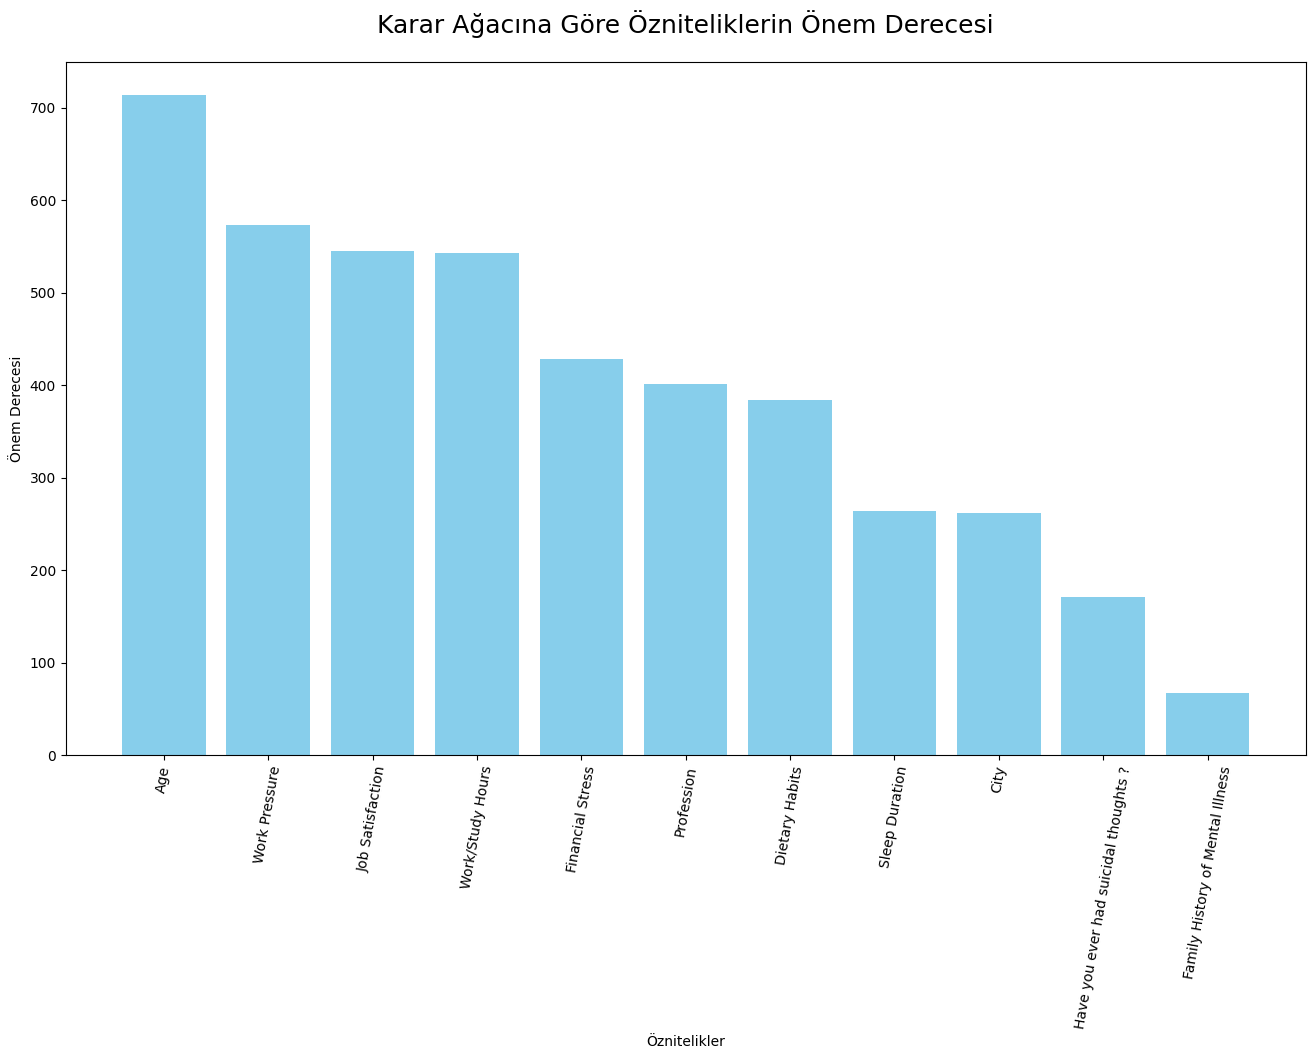

In [70]:
# Özellik önem derecelerini modelden al
feature_importances = lgbm_empmodel.feature_importances_  # Trained model's feature importances
columns = X_train.columns  # Eğitim veri setindeki özellik adları

# En önemli 11 özelliği seç
sorted_indices = np.argsort(feature_importances)[::-1][:11]
sorted_importances = feature_importances[sorted_indices]
sorted_features = np.array(columns)[sorted_indices]

# Görselleştirme
plt.figure(figsize=(16, 9))
plt.title("Karar Ağacına Göre Özniteliklerin Önem Derecesi", y=1.03, size=18)
plt.bar(range(len(sorted_features)), sorted_importances, color="skyblue", align="center")
plt.xticks(range(len(sorted_features)), sorted_features, rotation=80)
plt.xlabel("Öznitelikler")
plt.ylabel("Önem Derecesi")
plt.show()